In [142]:
# IMPORT AND DISPLAY SETTINGS

# !pip install pandas
# !pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import re

# pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format




In [143]:
# LOAD DATASET

user_data = pd.read_csv(r"raw-data\Dataset.csv")
# print(user_data.columns)
print(user_data.shape)

(121856, 40)


C:\Users\Pankaj\AppData\Local\Temp\ipykernel_27224\3740303952.py:3: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv(r"raw-data\Dataset.csv")


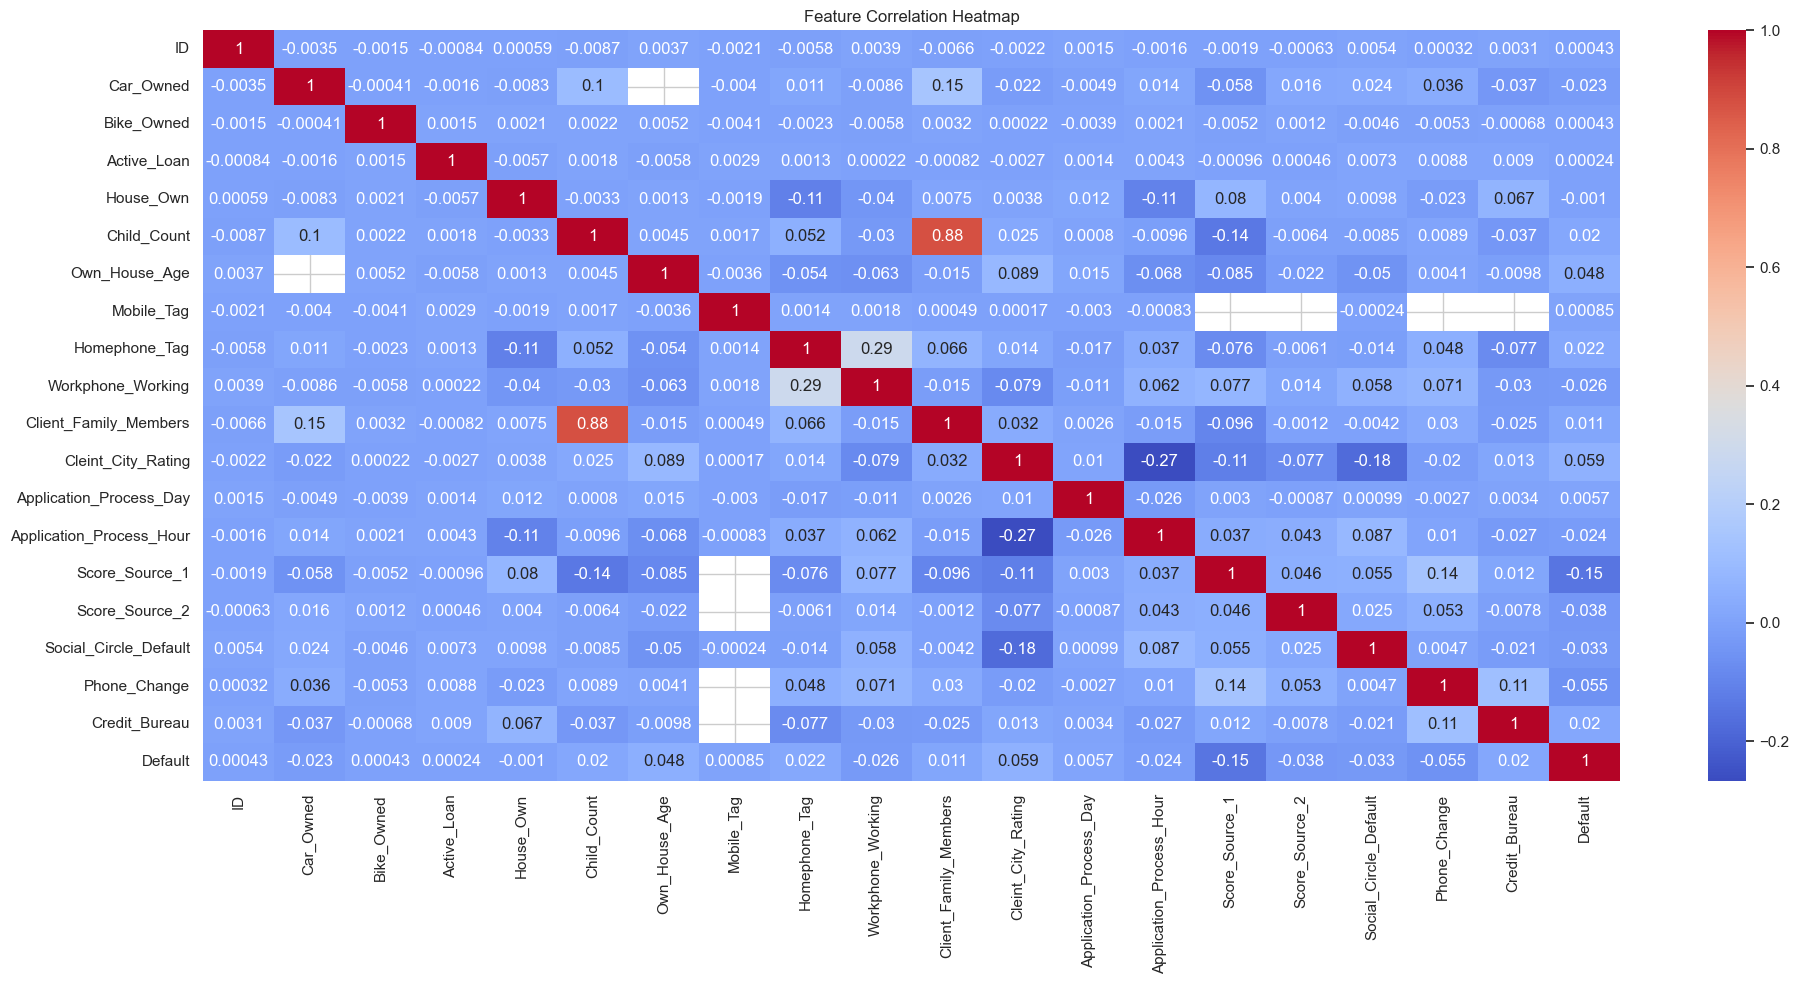

In [144]:
# PEEK AT CO-RELATION HEATMAP
corr = user_data.corr(numeric_only=True)
plt.figure(figsize=(20, 10))  # Adjust size here as needed
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()

In [145]:
corr['Default'].reset_index().sort_values(by='Default')

index  Default
14            Score_Source_1    -0.15
17              Phone_Change    -0.05
15            Score_Source_2    -0.04
16     Social_Circle_Default    -0.03
9          Workphone_Working    -0.03
13  Application_Process_Hour    -0.02
1                  Car_Owned    -0.02
4                  House_Own    -0.00
3                Active_Loan     0.00
2                 Bike_Owned     0.00
0                         ID     0.00
7                 Mobile_Tag     0.00
12   Application_Process_Day     0.01
10     Client_Family_Members     0.01
5                Child_Count     0.02
18             Credit_Bureau     0.02
8              Homephone_Tag     0.02
6              Own_House_Age     0.05
11        Cleint_City_Rating     0.06
19                   Default     1.00

In [146]:
# CORELATION MATRIX - INTERPRETATION


In [147]:
# Low correlation values in EDA don't mean features are useless — they only show linear relationships. '
# 'Many real-world patterns are non-linear or depend on combinations of features, which correlation can't capture. 
# Tree-based models like Random Forest or XGBoost can still perform well by identifying these complex patterns. So, even weakly correlated features can be valuable when used together. 

In [148]:
# Since our dataset shows low linear correlation between features and the target (Default), you should use non-linear, tree-based models like Random Forest, XGBoost, or LightGBM. 
# These models are better at capturing complex patterns and interactions that linear models (like Logistic Regression) might miss.
# They also handle missing values and mixed feature types more effectively, making them a strong choice for this kind of data.

In [149]:
# Not all the expected numeric columns are showing up, maybe issue with data-types
# Work on data cleaning, and perform EDA after that

In [150]:
user_data.drop(columns='ID',inplace=True)

In [151]:
# user_data.astype('object').columns

# some of these columns are numeric but marked with dtype object

In [152]:
user_data.dtypes

Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_

In [153]:

def clean_and_convert_numeric_columns(df, threshold=0.9, verbose=True):
    """
    Detects object columns that are actually numeric, cleans them,
    and converts to numeric type if enough values are valid.

    Parameters:
        df (pd.DataFrame): Your input DataFrame
        threshold (float): Minimum % of convertible values to treat column as numeric
        verbose (bool): If True, prints which columns are converted

    Returns:
        df (pd.DataFrame): Updated DataFrame with converted columns
        converted_cols (list): List of converted column names
    """
    object_cols = df.select_dtypes(include='object').columns
    converted_cols = []

    for col in object_cols:
        original = df[col]

        # Step 1: Clean common symbols
        # print(col)
        # print(original.notna().mean())

        cleaned = (
            original.astype(str)
            .str.replace(r'[$₹,%]', '', regex=True)
            .str.replace(',', '')
            .str.strip()
        )

        # Step 2: Try converting to numeric
        converted = pd.to_numeric(cleaned, errors='coerce')

        # Step 3: Check conversion ratio (ignores existing NaNs too)
        valid_ratio = converted.notna().mean()

        if valid_ratio >= threshold:
            df[col] = converted
            converted_cols.append(col)
            if verbose:
                print(f"✅ Converted: {col} (Valid Ratio: {valid_ratio:.2f})")
        else:
            if verbose:
                print(f"❌ Skipped : {col} (Valid Ratio: {valid_ratio:.2f})")

    return df, converted_cols

In [154]:
user_data, converted_cols = clean_and_convert_numeric_columns(user_data, threshold=0.9, verbose=True)
converted_cols

✅ Converted: Client_Income (Valid Ratio: 0.97)
✅ Converted: Credit_Amount (Valid Ratio: 0.97)
✅ Converted: Loan_Annuity (Valid Ratio: 0.96)
❌ Skipped : Accompany_Client (Valid Ratio: 0.00)
❌ Skipped : Client_Income_Type (Valid Ratio: 0.00)
❌ Skipped : Client_Education (Valid Ratio: 0.00)
❌ Skipped : Client_Marital_Status (Valid Ratio: 0.00)
❌ Skipped : Client_Gender (Valid Ratio: 0.00)
❌ Skipped : Loan_Contract_Type (Valid Ratio: 0.00)
❌ Skipped : Client_Housing_Type (Valid Ratio: 0.00)
✅ Converted: Population_Region_Relative (Valid Ratio: 0.96)
✅ Converted: Age_Days (Valid Ratio: 0.97)
✅ Converted: Employed_Days (Valid Ratio: 0.97)
✅ Converted: Registration_Days (Valid Ratio: 0.97)
✅ Converted: ID_Days (Valid Ratio: 0.95)
❌ Skipped : Client_Occupation (Valid Ratio: 0.00)
❌ Skipped : Client_Permanent_Match_Tag (Valid Ratio: 0.00)
❌ Skipped : Client_Contact_Work_Tag (Valid Ratio: 0.00)
❌ Skipped : Type_Organization (Valid Ratio: 0.00)
❌ Skipped : Score_Source_3 (Valid Ratio: 0.78)


['Client_Income',
 'Credit_Amount',
 'Loan_Annuity',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days']

In [155]:
# Score_Source_3 has too many null values already, cant cross threshold. Need to convert seperately
user_data['Score_Source_3'] = user_data['Score_Source_3'].astype(str).str.replace(r'[$₹,%]', '', regex=True).str.replace(',', '').str.strip()
user_data['Score_Source_3'] = pd.to_numeric(user_data['Score_Source_3'], errors='coerce')

In [156]:
# Now we have two kind of columns - categorical with object dtype and numerical with dtype as float/int
user_data.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_

In [157]:
user_data.select_dtypes('object').head()


Accompany_Client Client_Income_Type    Client_Education  \
0            Alone         Commercial           Secondary   
1            Alone            Service          Graduation   
2            Alone            Service  Graduation dropout   
3            Alone            Retired           Secondary   
4            Alone         Commercial           Secondary   

  Client_Marital_Status Client_Gender Loan_Contract_Type Client_Housing_Type  \
0                     M          Male                 CL                Home   
1                     M          Male                 CL                Home   
2                     W          Male                 CL              Family   
3                     M          Male                 CL                Home   
4                     M        Female                 CL                Home   

  Client_Occupation Client_Permanent_Match_Tag Client_Contact_Work_Tag  \
0             Sales                        Yes                     Yes   
1               NaN                        Yes                     Yes   
2     Realty agents                        Yes                     Yes   
3               NaN                        Yes                     Yes   
4          Laborers                        Yes                     Yes   

        Type_Organization  
0           Self-employed  
1              Government  
2           Self-employed  
3                     XNA  
4  Business Entity Type 3

In [158]:
user_data.select_dtypes(['float64','int64']).head()


Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0        6750.00       0.00        0.00         1.00       0.00         0.00   
1       20250.00       1.00        0.00         1.00        NaN         0.00   
2       18000.00       0.00        0.00         1.00       0.00         1.00   
3       15750.00       0.00        0.00         1.00       1.00         0.00   
4       33750.00       1.00        0.00         1.00       0.00         2.00   

   Credit_Amount  Loan_Annuity  Population_Region_Relative  Age_Days  \
0       61190.55       3416.85                        0.03  13957.00   
1       15282.00       1826.55                        0.01  14162.00   
2       59527.35       2788.20                        0.02  16790.00   
3       53870.40       2295.45                        0.01  23195.00   
4      133988.40       3547.35                        0.02  11366.00   

   Employed_Days  Registration_Days  ID_Days  Own_House_Age  Mobile_Tag  \
0        1062.00            6123.00   383.00            NaN           1   
1        4129.00            7833.00    21.00           0.00           1   
2        5102.00                NaN   331.00            NaN           1   
3      365243.00                NaN   775.00            NaN           1   
4        2977.00            5516.00  4043.00           6.00           1   

   Homephone_Tag  Workphone_Working  Client_Family_Members  \
0              1                  0                   2.00   
1              0                  1                   2.00   
2              0                  0                   2.00   
3              0                  0                   2.00   
4              0                  0                   4.00   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                2.00                     6.00                     17.00   
1                2.00                     3.00                     10.00   
2                2.00                     4.00                       NaN   
3                3.00                     2.00                     15.00   
4                1.00                     3.00                       NaN   

   Score_Source_1  Score_Source_2  Score_Source_3  Social_Circle_Default  \
0            0.57            0.48             NaN                   0.02   
1            0.56            0.22             NaN                    NaN   
2             NaN            0.55            0.33                   0.07   
3             NaN            0.14            0.63                    NaN   
4            0.51            0.30            0.36                   0.20   

   Phone_Change  Credit_Bureau  Default  
0         63.00            NaN        0  
1           NaN            NaN        0  
2        277.00           0.00        0  
3       1700.00           3.00        0  
4        674.00           1.00        0

In [159]:
# data-types fixed
# Check MIssing values & data distribution now
user_data.describe()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
count      118234.00  118275.00   118232.00    118221.00  118195.00   
mean        16865.19       0.34        0.33         0.50       0.69   
std         11538.15       0.47        0.47         0.50       0.46   
min          2565.00       0.00        0.00         0.00       0.00   
25%         11250.00       0.00        0.00         0.00       0.00   
50%         14400.00       0.00        0.00         0.00       1.00   
75%         20250.00       1.00        1.00         1.00       1.00   
max       1800009.00       1.00        1.00         1.00       1.00   

       Child_Count  Credit_Amount  Loan_Annuity  Population_Region_Relative  \
count    118218.00      118219.00     117030.00                   116988.00   
mean          0.42       60046.49       2721.25                        0.02   
std           0.73       40350.66       1461.47                        0.41   
min           0.00        4500.00        217.35                        0.00   
25%           0.00       27000.00       1657.35                        0.01   
50%           0.00       51750.00       2499.75                        0.02   
75%           1.00       80865.00       3466.80                        0.03   
max          19.00      405000.00      22500.00                      100.00   

       Age_Days  Employed_Days  Registration_Days   ID_Days  Own_House_Age  \
count 118239.00      118190.00          118225.00 115871.00       41761.00   
mean   16027.42       67154.07            4975.16   2987.47          12.16   
std     4366.36      138971.78            3514.55   1511.88          12.06   
min     7676.00           0.00               0.00      0.00           0.00   
25%    12398.00         932.00            2008.00   1705.00           5.00   
50%    15734.00        2212.00            4493.00   3242.00           9.00   
75%    19661.00        5634.00            7464.00   4295.00          15.00   
max    25201.00      365243.00           23738.00   7197.00          69.00   

       Mobile_Tag  Homephone_Tag  Workphone_Working  Client_Family_Members  \
count   121856.00      121856.00          121856.00              119446.00   
mean         1.00           0.20               0.28                   2.15   
std          0.00           0.40               0.45                   0.91   
min          0.00           0.00               0.00                   1.00   
25%          1.00           0.00               0.00                   2.00   
50%          1.00           0.00               0.00                   2.00   
75%          1.00           0.00               1.00                   3.00   
max          1.00           1.00               1.00                  16.00   

       Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
count           119447.00                119428.00                 118193.00   
mean                 2.03                     3.16                     12.06   
std                  0.50                     1.76                      3.28   
min                  1.00                     0.00                      0.00   
25%                  2.00                     2.00                     10.00   
50%                  2.00                     3.00                     12.00   
75%                  2.00                     5.00                     14.00   
max                  3.00                     6.00                     23.00   

       Score_Source_1  Score_Source_2  Score_Source_3  Social_Circle_Default  \
count        53021.00       116170.00        94934.00               59928.00   
mean             0.50            0.52            0.51                   0.12   
std              0.21            0.74            0.19                   0.11   
min              0.01            0.00            0.00                   0.00   
25%              0.33            0.39            0.37                   0.06   
50%              0.50            0.56           

In [160]:
# NOT NULL VALUE %
total_rows = 121856
(user_data.describe().T['count']/total_rows).reset_index().sort_values(by='count')

index  count
13               Own_House_Age   0.34
21              Score_Source_1   0.44
24       Social_Circle_Default   0.49
23              Score_Source_3   0.78
26               Credit_Bureau   0.85
12                     ID_Days   0.95
22              Score_Source_2   0.95
8   Population_Region_Relative   0.96
7                 Loan_Annuity   0.96
10               Employed_Days   0.97
25                Phone_Change   0.97
20    Application_Process_Hour   0.97
4                    House_Own   0.97
5                  Child_Count   0.97
6                Credit_Amount   0.97
3                  Active_Loan   0.97
11           Registration_Days   0.97
2                   Bike_Owned   0.97
0                Client_Income   0.97
9                     Age_Days   0.97
1                    Car_Owned   0.97
19     Application_Process_Day   0.98
17       Client_Family_Members   0.98
18          Cleint_City_Rating   0.98
15               Homephone_Tag   1.00
14                  Mobile_Tag   1.00
16           Workphone_Working   1.00
27                     Default   1.00

In [161]:
# Initial observation - too many outliers and missing values

In [ ]:
# REMOVE OUTLIRES
def clip_outliers(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 = df_col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_col.clip(lower=lower_bound, upper=upper_bound)

def impute_missing_values(df_col, data_type):
    
    if data_type == 'Numeric':
        return df_col.fillna(df_col.median())
    elif data_type == 'Categorical':
        return df_col.fillna(df_col.mode()[0])
    else:
        return df_col  


# Note: Need special attention on imputation for colomns with binary value types

# since we are using median for impute, imputation can be done before clipping. But not neccesory for all cases.

def clean_dataframe(df, drop_threshold=0.1):
    for col in df.columns:
        missing_pct = df[col].isna().mean()
        
        # Drop if missing % is too high
        if missing_pct > drop_threshold:
            print(f"Flagged {col} - missing {missing_pct*100:.2f}%")
            # df.drop(columns=[col], inplace=True)
            continue

        if df[col].dtype in ['float64', 'int64'] and df[col].nunique()>1 and col != 'Default':
            
            # if there's only 1 unique value in df, it is imputing that as mode/median for NaN values making whole column as constant - df[col].nunique()>1 
            # user_data.nunique().reset_index().sort_values(by=0)

            print(col, missing_pct)
            df[col] = impute_missing_values(df[col], 'Numeric')
            if df[col].nunique()>10:
                df[col] = clip_outliers(df[col])
                # In columns with 0,1, value 1 is getting clipped,as it might be coming as outliers (i.e beyond whiskers in boxplot)
                # No need to clip outliers, if numeric columns is like category(0,1,2,3...., keeping threshold as 10 unique values. If unique values > 10, clipping outliers will be applicable)

        elif df[col].dtype == 'object':
            df[col] = impute_missing_values(df[col], 'Categorical')
            
    return df


In [163]:
user_data = clean_dataframe(user_data) 


Client_Income 0.02972360819327731
Child_Count 0.029854910714285716
Credit_Amount 0.02984670430672269
Loan_Annuity 0.03960412289915966
Population_Region_Relative 0.03994879201680672
Age_Days 0.029682576155462184
Employed_Days 0.03008469012605042
Registration_Days 0.02979746586134454
ID_Days 0.049115349264705885
Flagged Own_House_Age - missing 65.73%
Flagged Client_Occupation - missing 34.00%
Client_Family_Members 0.019777442226890755
Cleint_City_Rating 0.01976923581932773
Application_Process_Day 0.01992515756302521
Application_Process_Hour 0.030060070903361345
Flagged Score_Source_1 - missing 56.49%
Score_Source_2 0.046661633403361345
Flagged Score_Source_3 - missing 22.09%
Flagged Social_Circle_Default - missing 50.82%
Phone_Change 0.03006827731092437
Flagged Credit_Bureau - missing 15.21%


In [164]:
# TILL THIS POINT, OUTLIERS ARE CLIPPED, MISSING VALUES ARE IMPUTED(except for col with  large missing %(>10%)).

In [165]:
#  Low Missing (Safe to Impute)
# Client_Income, Car_Owned, Bike_Owned, Active_Loan, House_Own, Child_Count, Credit_Amount, Loan_Annuity, Population_Region_Relative, Age_Days, Employed_Days, Registration_Days, ID_Days, Client_Family_Members, Cleint_City_Rating, Application_Process_Day, Application_Process_Hour, Phone_Change, Score_Source_2

# All of these are <10% missing – our current method is fine.

  

# ⚠️ High Missing (Needs Special Attention)
# Own_House_Age: 65.7% missing → Consider dropping unless it's critical.

# Client_Occupation - missing 34.00% -  Impute only if relevant.

# Score_Source_1: 56.4% missing → Consider dropping or imputing via ML model if important.

# Score_Source_3: 22% missing → Impute only if relevant.

# Social_Circle_Default: 50.8% missing → Consider dropping.

# Credit_Bureau: 15.2% missing → Safe to impute if important.



# look how they behave with output label before imputing
# Score_Source_3: 22%
# Credit_Bureau: 15.2%
# Client_Occupation: 34.00%


            

# rest all have huge missing count can be dropped for now, later if required can be analyzed.
# Own_House_Age
# Score_Source_1
# Social_Circle_Default


In [166]:
# 1.  Score_Source_3: 22%

user_data['Score_Source_3'].sample(5)

1928      NaN
59328     NaN
107117   0.47
80405     NaN
19719    0.62
Name: Score_Source_3, dtype: float64

<Axes: xlabel='Score_Source_3', ylabel='Default'>

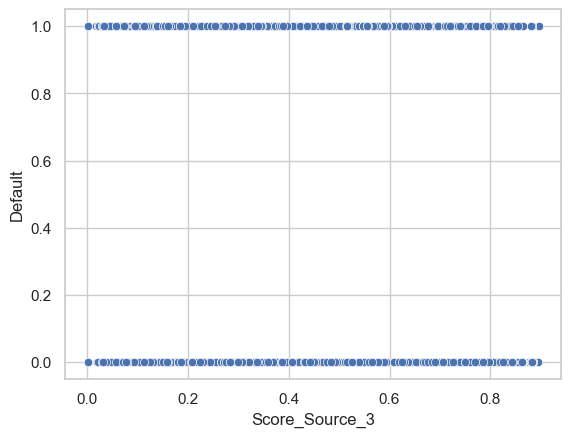

In [167]:
sns.scatterplot(data=user_data, x='Score_Source_3', y='Default')

         count  mean  median  min  max  std
Default                                    
0        87475  0.52    0.55 0.00 0.89 0.19
1         7459  0.39    0.39 0.00 0.90 0.21


<Axes: xlabel='Default', ylabel='Score_Source_3'>

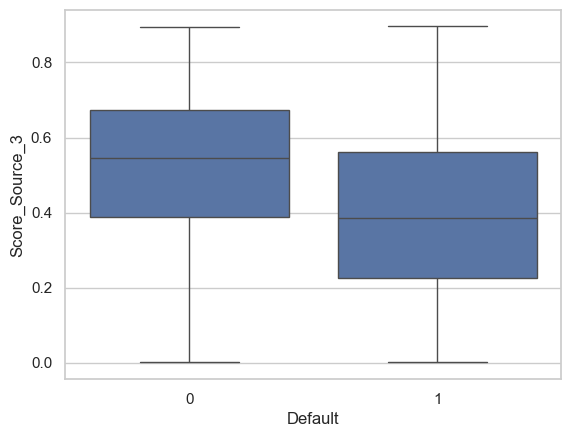

In [168]:
print(user_data.groupby('Default')['Score_Source_3'].agg(['count', 'mean', 'median', 'min', 'max', 'std']))
sns.boxplot(data=user_data, x='Default', y='Score_Source_3')


<Axes: xlabel='Credit_Bureau', ylabel='Count'>

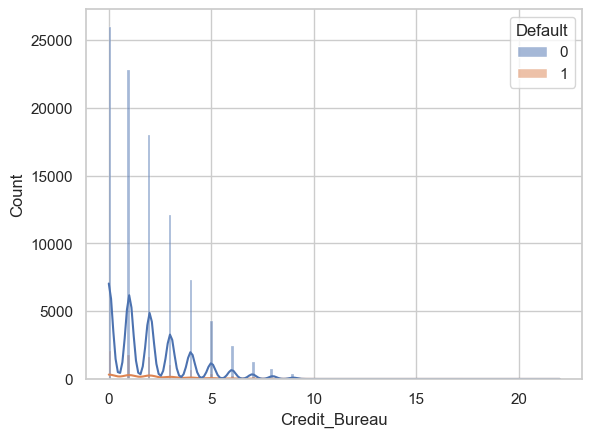

In [169]:
user_data.groupby('Default')['Credit_Bureau'].agg(['count', 'mean', 'median'])
sns.histplot(data=user_data, x='Credit_Bureau', hue='Default', kde=True)


In [170]:
print(user_data.groupby('Default')['Credit_Bureau'].agg(['count', 'mean', 'median', 'min', 'max', 'std']))
# sns.boxplot(data=user_data, x='Default', y='Credit_Bureau')

         count  mean  median  min   max  std
Default                                     
0        95296  1.88    1.00 0.00 21.00 1.85
1         8020  2.02    2.00 0.00 22.00 1.96


In [171]:
# People who defaulted (1) have a slightly higher average number of credit bureau inquiries.

# Median for defaulters is 2 vs 1 for non-defaulters — this is directionally useful.
    
    # # Simple median imputation
# user_data['Credit_Bureau'] = duser_dataf['Credit_Bureau'].fillna(user_data['Credit_Bureau'].median())

# # Or stratified (slightly better)
# user_data['Credit_Bureau'] = user_data.groupby('Default')['Credit_Bureau'].transform(lambda x: x.fillna(x.median()))

user_data['Credit_Bureau'] = user_data.groupby('Default')['Credit_Bureau'].transform(lambda x: x.fillna(x.median()))
user_data['Score_Source_3'] = user_data.groupby('Default')['Score_Source_3'].transform(lambda x: x.fillna(x.median()))


In [172]:
user_data['Client_Occupation'].value_counts()

Client_Occupation
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64

Client_Occupation
NaN                   41435
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64


<Axes: xlabel='Client_Occupation'>

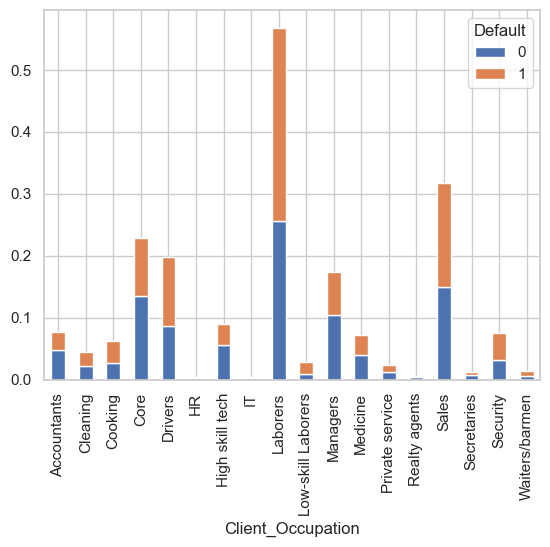

In [173]:
print(user_data['Client_Occupation'].value_counts(dropna=False))
user_data.groupby('Default')['Client_Occupation'].value_counts(normalize=True).unstack().T.plot(kind='bar', stacked=True)



In [174]:
pd.crosstab(user_data['Client_Occupation'], user_data['Default'], normalize='index').sort_values(by=1)  # Row-wise percentage

Default               0    1
Client_Occupation           
HR                 0.95 0.05
Accountants        0.95 0.05
High skill tech    0.94 0.06
Managers           0.94 0.06
Core               0.94 0.06
Secretaries        0.93 0.07
Private service    0.93 0.07
Medicine           0.93 0.07
Realty agents      0.93 0.07
IT                 0.92 0.08
Cleaning           0.91 0.09
Sales              0.90 0.10
Waiters/barmen     0.90 0.10
Laborers           0.90 0.10
Drivers            0.89 0.11
Cooking            0.89 0.11
Security           0.89 0.11
Low-skill Laborers 0.83 0.17

In [175]:
pd.crosstab(user_data['Client_Occupation'], user_data['Default'], normalize='index').sort_values(by=1)[1].mean()

np.float64(0.08654657523535168)

In [176]:
pd.crosstab(user_data['Client_Occupation'], user_data['Default'], normalize='index').sort_values(by=1)[1].median()

np.float64(0.07831632653061224)

In [177]:
data_with_nan_occupation = user_data[user_data['Client_Occupation'].isna()]
data_with_nan_occupation['Default'].value_counts(normalize=True)

Default
0   0.93
1   0.07
Name: proportion, dtype: float64

In [178]:
# Missing Client_Occupation has a slightly higher default rate than the overall average.

# So, missingness is not completely random — it carries a bit of signal.

user_data['Client_Occupation'] = user_data['Client_Occupation'].fillna('Missing')

In [179]:
user_data.head(5)

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0        6750.00       0.00        0.00         1.00       0.00         0.00   
1       20250.00       1.00        0.00         1.00        NaN         0.00   
2       18000.00       0.00        0.00         1.00       0.00         1.00   
3       15750.00       0.00        0.00         1.00       1.00         0.00   
4       33750.00       1.00        0.00         1.00       0.00         2.00   

   Credit_Amount  Loan_Annuity Accompany_Client Client_Income_Type  \
0       61190.55       3416.85            Alone         Commercial   
1       15282.00       1826.55            Alone            Service   
2       59527.35       2788.20            Alone            Service   
3       53870.40       2295.45            Alone            Retired   
4      133988.40       3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type  Population_Region_Relative  Age_Days  Employed_Days  \
0                Home                        0.03  13957.00        1062.00   
1                Home                        0.01  14162.00        4129.00   
2              Family                        0.02  16790.00        5102.00   
3                Home                        0.01  23195.00       12019.50   
4                Home                        0.02  11366.00        2977.00   

   Registration_Days  ID_Days  Own_House_Age  Mobile_Tag  Homephone_Tag  \
0            6123.00   383.00            NaN           1              1   
1            7833.00    21.00           0.00           1              0   
2            4493.00   331.00            NaN           1              0   
3            4493.00   775.00            NaN           1              0   
4            5516.00  4043.00           6.00           1              0   

   Workphone_Working Client_Occupation  Client_Family_Members  \
0                  0             Sales                   2.00   
1                  1           Missing                   2.00   
2                  0     Realty agents                   2.00   
3                  0           Missing                   2.00   
4                  0          Laborers                   4.00   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                2.00                     6.00                     17.00   
1                2.00                     3.00                     10.00   
2                2.00                     4.00                     12.00   
3                2.00                     2.00                     15.00   
4                2.00                     3.00                     12.00   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
3                        Yes                     Yes                     XNA   
4                        Yes                     Yes  Business Entity Type 3   

   Score_Source_1  Score_Source_2  Score_Source_3  Social_Circle_Default  \
0            0.57            0.48            0.55                   0.02   
1            0.56            0.22            0.55                    NaN   
2             NaN            0.55            0.33                   0.07   
3             NaN            0.14            0.63                  

In [180]:
user_data.describe()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
count      121856.00  118275.00   118232.00    118221.00  118195.00   
mean        16205.61       0.34        0.33         0.50       0.69   
std          7233.59       0.47        0.47         0.50       0.46   
min          2565.00       0.00        0.00         0.00       0.00   
25%         11250.00       0.00        0.00         0.00       0.00   
50%         14400.00       0.00        0.00         0.00       1.00   
75%         20250.00       1.00        1.00         1.00       1.00   
max         33750.00       1.00        1.00         1.00       1.00   

       Child_Count  Credit_Amount  Loan_Annuity  Population_Region_Relative  \
count    121856.00      121856.00     121856.00                   121856.00   
mean          0.40       59125.55       2676.79                        0.02   
std           0.68       37532.09       1293.91                        0.01   
min           0.00        4500.00        217.35                        0.00   
25%           0.00       27450.00       1687.50                        0.01   
50%           0.00       51750.00       2499.75                        0.02   
75%           1.00       80865.00       3407.96                        0.03   
max           2.50      160987.50       5988.66                        0.05   

       Age_Days  Employed_Days  Registration_Days   ID_Days  Own_House_Age  \
count 121856.00      121856.00          121856.00 121856.00       41761.00   
mean   16018.71        4036.79            4957.26   2999.97          12.16   
std     4301.35        4184.72            3450.88   1475.31          12.06   
min     7676.00           0.00               0.00      0.00           0.00   
25%    12512.00         962.00            2102.00   1789.00           5.00   
50%    15734.00        2212.00            4493.00   3242.00           9.00   
75%    19544.00        5385.00            7350.00   4263.00          15.00   
max    25201.00       12019.50           15222.00   7197.00          69.00   

       Mobile_Tag  Homephone_Tag  Workphone_Working  Client_Family_Members  \
count   121856.00      121856.00          121856.00              121856.00   
mean         1.00           0.20               0.28                   2.14   
std          0.00           0.40               0.45                   0.87   
min          0.00           0.00               0.00                   1.00   
25%          1.00           0.00               0.00                   2.00   
50%          1.00           0.00               0.00                   2.00   
75%          1.00           0.00               1.00                   3.00   
max          1.00           1.00               1.00                   4.50   

       Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
count           121856.00                121856.00                 121856.00   
mean                 2.00                     3.16                     12.07   
std                  0.00                     1.74                      3.20   
min                  2.00                     0.00                      4.00   
25%                  2.00                     2.00                     10.00   
50%                  2.00                     3.00                     12.00   
75%                  2.00                     5.00                     14.00   
max                  2.00                     6.00                     20.00   

       Score_Source_1  Score_Source_2  Score_Source_3  Social_Circle_Default  \
count        53021.00       121856.00       121856.00               59928.00   
mean             0.50            0.52            0.52                   0.12   
std              0.21            0.19            0.17                   0.11   
min              0.01            0.02            0.00                   0.00   
25%              0.33            0.40            0.40                   0.06   
50%              0.50            0.56           

In [181]:
user_data.drop(columns=['Own_House_Age', 'Score_Source_1', 'Social_Circle_Default'],inplace=True)

In [182]:
user_data.isna().sum().reset_index()

index     0
0                Client_Income     0
1                    Car_Owned  3581
2                   Bike_Owned  3624
3                  Active_Loan  3635
4                    House_Own  3661
5                  Child_Count     0
6                Credit_Amount     0
7                 Loan_Annuity     0
8             Accompany_Client     0
9           Client_Income_Type     0
10            Client_Education     0
11       Client_Marital_Status     0
12               Client_Gender     0
13          Loan_Contract_Type     0
14         Client_Housing_Type     0
15  Population_Region_Relative     0
16                    Age_Days     0
17               Employed_Days     0
18           Registration_Days     0
19                     ID_Days     0
20                  Mobile_Tag     0
21               Homephone_Tag     0
22           Workphone_Working     0
23           Client_Occupation     0
24       Client_Family_Members     0
25          Cleint_City_Rating     0
26     Application_Process_Day     0
27    Application_Process_Hour     0
28  Client_Permanent_Match_Tag     0
29     Client_Contact_Work_Tag     0
30           Type_Organization     0
31              Score_Source_2     0
32              Score_Source_3     0
33                Phone_Change     0
34               Credit_Bureau     0
35                     Default     0

In [183]:
# NO MORE MISSING VALUES
# FIX OULIERS OF NEWLY IMPUTED VALUES
user_data['Score_Source_3'] = clip_outliers(user_data['Score_Source_3'])
user_data['Credit_Bureau'] = clip_outliers(user_data['Credit_Bureau'])


In [184]:
# # Own_House_Age: 65.7% missing → Consider dropping unless it's critical.
# sns.scatterplot(data=user_data, x='Own_House_Age', y='Default')

In [185]:
# user_data.groupby('Default')['Own_House_Age'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])

# # No point in keeping this feature

In [186]:
# # Score_Source_1: 56.4% missing → Consider dropping or imputing via ML model if important.
# sns.scatterplot(data=user_data, x='Score_Source_1',y='Default')
# user_data.groupby('Default')['Score_Source_1'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])

In [187]:
# Defaulters have lower scores: Mean drops from 0.51 → 0.39, which is quite significant.

# Median also shifts from 0.52 → 0.37, reinforcing this.

# Might help after imputation

# Option A: Add Missing Indicator

# user_data['Score_Source_1_Missing'] = user_data['Score_Source_1'].isna().astype(int)
# → Helps model leverage the fact that missingness might be informative.

# Option B: Impute with Class-wise Median

# user_data['Score_Source_1'] = user_data.groupby('Default')['Score_Source_1'].transform(
#     lambda x: x.fillna(x.median())
# )
# → Safer than global median, maintains the class-based signal.

In [188]:
# user_data['Score_Source_1'] = user_data.groupby('Default')['Score_Source_1'].transform(
#     lambda x: x.fillna(x.median())
# )

# # remove outliers then impute mssing values if missing % less than 10%
# # if missing pct > 10% investigate columns and their behaviour with output label and impute accordingly.

In [189]:
# Own_House_Age
# Score_Source_1
# Social_Circle_Default

In [190]:
user_data.head()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0        6750.00       0.00        0.00         1.00       0.00         0.00   
1       20250.00       1.00        0.00         1.00        NaN         0.00   
2       18000.00       0.00        0.00         1.00       0.00         1.00   
3       15750.00       0.00        0.00         1.00       1.00         0.00   
4       33750.00       1.00        0.00         1.00       0.00         2.00   

   Credit_Amount  Loan_Annuity Accompany_Client Client_Income_Type  \
0       61190.55       3416.85            Alone         Commercial   
1       15282.00       1826.55            Alone            Service   
2       59527.35       2788.20            Alone            Service   
3       53870.40       2295.45            Alone            Retired   
4      133988.40       3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type  Population_Region_Relative  Age_Days  Employed_Days  \
0                Home                        0.03  13957.00        1062.00   
1                Home                        0.01  14162.00        4129.00   
2              Family                        0.02  16790.00        5102.00   
3                Home                        0.01  23195.00       12019.50   
4                Home                        0.02  11366.00        2977.00   

   Registration_Days  ID_Days  Mobile_Tag  Homephone_Tag  Workphone_Working  \
0            6123.00   383.00           1              1                  0   
1            7833.00    21.00           1              0                  1   
2            4493.00   331.00           1              0                  0   
3            4493.00   775.00           1              0                  0   
4            5516.00  4043.00           1              0                  0   

  Client_Occupation  Client_Family_Members  Cleint_City_Rating  \
0             Sales                   2.00                2.00   
1           Missing                   2.00                2.00   
2     Realty agents                   2.00                2.00   
3           Missing                   2.00                2.00   
4          Laborers                   4.00                2.00   

   Application_Process_Day  Application_Process_Hour  \
0                     6.00                     17.00   
1                     3.00                     10.00   
2                     4.00                     12.00   
3                     2.00                     15.00   
4                     3.00                     12.00   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
3                        Yes                     Yes                     XNA   
4                        Yes                     Yes  Business Entity Type 3   

   Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  Default  
0            0.48            0.55         63.00           1.00        0  
1            0.22            0.55        755.00           1.00        0  
2            0.55            0.33        277.00           0.00        0  
3            0.14            0.63       1700.00           3.00        0  
4            0.30            0.36        674.00           1.00        0

In [ ]:
# PLEASE UNCOMMENT TO GENERATE EDA REPORT

# from ydata_profiling import ProfileReport
# profile = ProfileReport(user_data, title="YData Profiling Report", explorative=True)
# profile.to_file("EDA_html_reports\ydata_eda_report.html")  # Opens in browser

In [192]:
# Based on univariate analysis, many columns in our dataset are skewed. In our case, model features are not linearly co-related witgh output label, so linear models might not work properly.
# We'll prefer tree based model which dont need normal distribution. Thus, we'll be skipping coloumn data transformation or adjusting skewness exercise.

In [193]:
# For all major tree-based models (Decision Tree, Random Forest, XGBoost, LightGBM, CatBoost):

#  - No need to scale data
#  - No need for normal distribution
#  - No need to manually fill missing values (especially for XGBoost, LightGBM, CatBoost — they handle NaNs internally)

# These models split data based on thresholds, so they are robust to skewed features, unscaled values, and missing data.

In [194]:
# Points to note from report:
# 1. 
# 2. Col Child_Count has a value type - 2.5, child count cant be 2.5, change that.
# 3. Credit_Amount co-realted to Loan_annuity
# 4. Mobile_Tag,Homephone_Tag, Cleint_City_Rating has a constant value - It is possible that during missing value imputation, we added mode to these columns. As there were only single value type, sam egot propagted to all rows, need to flag missing values
# 5. Few columns are highly imbalanced


In [195]:
# Drop Mobile Tag
# Homephone_Tag & Workphone_working should be collab


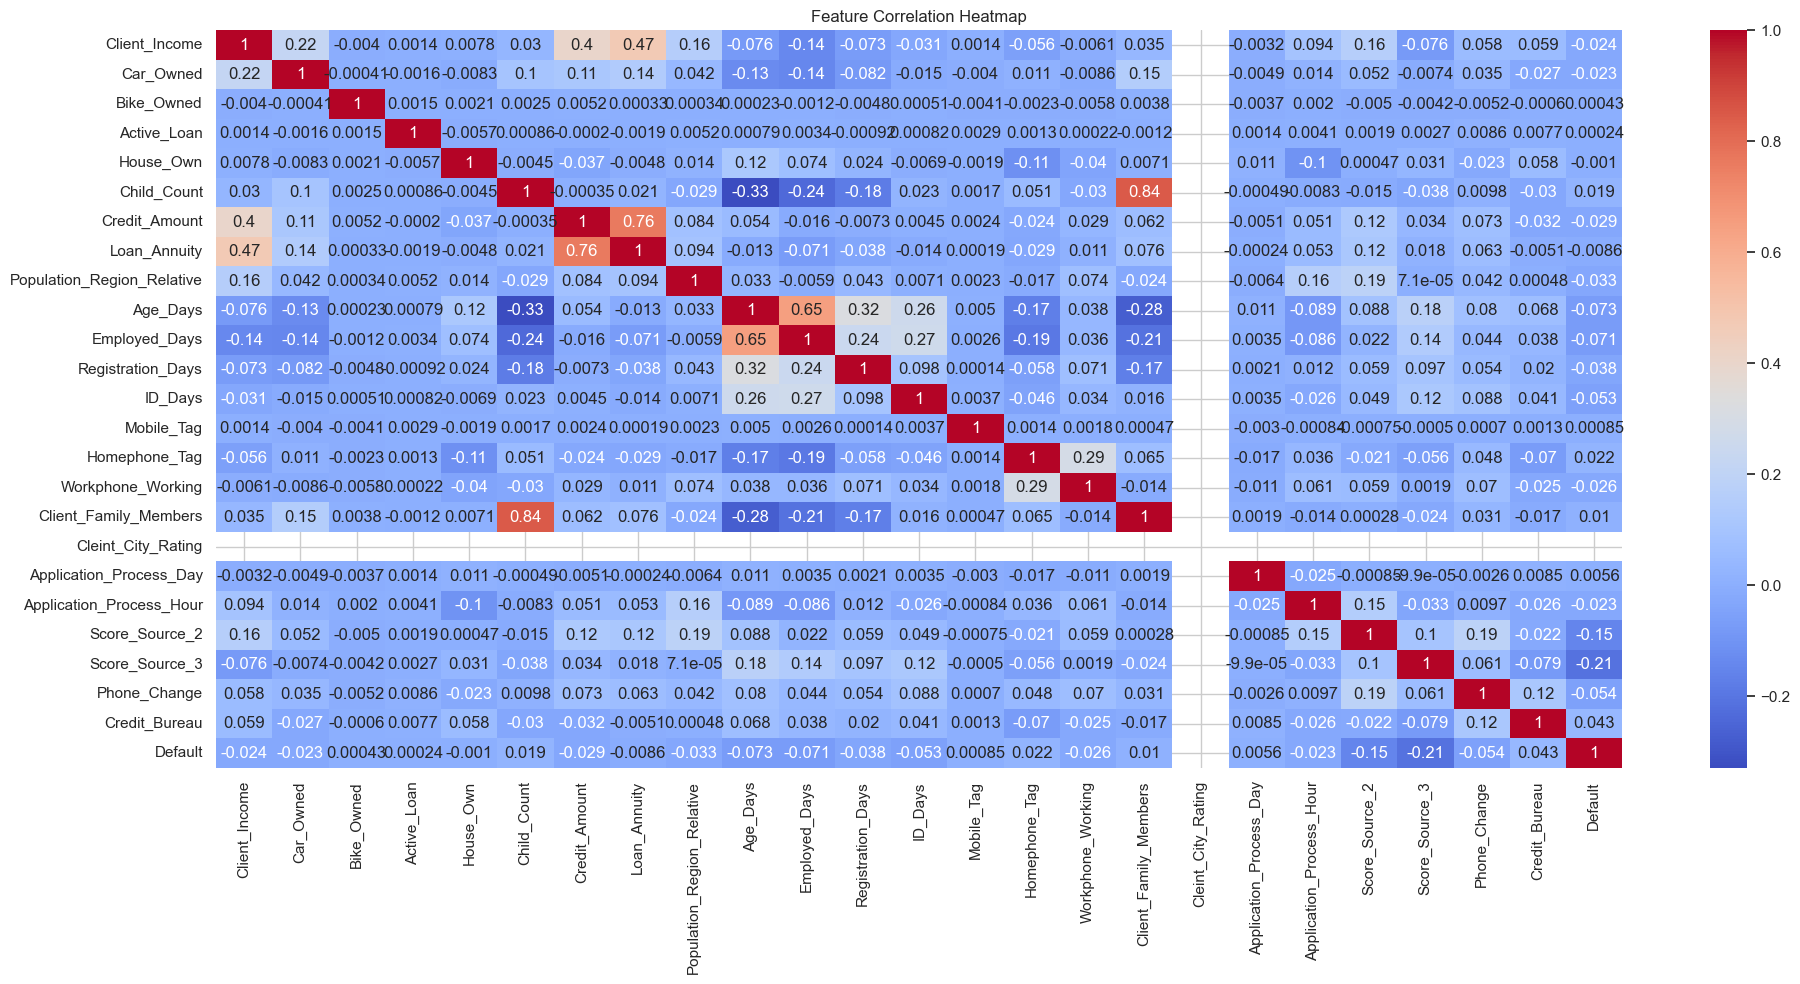

In [196]:

corr = user_data.corr(numeric_only=True)
plt.figure(figsize=(20, 10))  # Adjust size here as needed
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")

plt.tight_layout()

In [197]:
# Numeric columns vs Target variables

# DO INPUT FEATURES BEHAVE LINEARLY WITH OUTPUT LABEL?

corr['Default'].reset_index().sort_values(by='Default')
# Feature importance should be judged on model feature cofficients, as it looks like non-linear relationship

index  Default
21              Score_Source_3    -0.21
20              Score_Source_2    -0.15
9                     Age_Days    -0.07
10               Employed_Days    -0.07
22                Phone_Change    -0.05
12                     ID_Days    -0.05
11           Registration_Days    -0.04
8   Population_Region_Relative    -0.03
6                Credit_Amount    -0.03
15           Workphone_Working    -0.03
0                Client_Income    -0.02
19    Application_Process_Hour    -0.02
1                    Car_Owned    -0.02
7                 Loan_Annuity    -0.01
4                    House_Own    -0.00
3                  Active_Loan     0.00
2                   Bike_Owned     0.00
13                  Mobile_Tag     0.00
18     Application_Process_Day     0.01
16       Client_Family_Members     0.01
5                  Child_Count     0.02
14               Homephone_Tag     0.02
23               Credit_Bureau     0.04
24                     Default     1.00
17          Cleint_City_Rating      NaN

Client_Income  Car_Owned  Bike_Owned  Active_Loan  \
Client_Income                         NaN        NaN         NaN          NaN   
Car_Owned                             NaN        NaN         NaN          NaN   
Bike_Owned                            NaN        NaN         NaN          NaN   
Active_Loan                           NaN        NaN         NaN          NaN   
House_Own                             NaN        NaN         NaN          NaN   
Child_Count                           NaN        NaN         NaN          NaN   
Credit_Amount                         NaN        NaN         NaN          NaN   
Loan_Annuity                         0.47        NaN         NaN          NaN   
Population_Region_Relative            NaN        NaN         NaN          NaN   
Age_Days                              NaN        NaN         NaN          NaN   
Employed_Days                         NaN        NaN         NaN          NaN   
Registration_Days                     NaN        NaN         NaN          NaN   
ID_Days                               NaN        NaN         NaN          NaN   
Mobile_Tag                            NaN        NaN         NaN          NaN   
Homephone_Tag                         NaN        NaN         NaN          NaN   
Workphone_Working                     NaN        NaN         NaN          NaN   
Client_Family_Members                 NaN        NaN         NaN          NaN   
Cleint_City_Rating                    NaN        NaN         NaN          NaN   
Application_Process_Day               NaN        NaN         NaN          NaN   
Application_Process_Hour              NaN        NaN         NaN          NaN   
Score_Source_2                        NaN        NaN         NaN          NaN   
Score_Source_3                        NaN        NaN         NaN          NaN   
Phone_Change                          NaN        NaN         NaN          NaN   
Credit_Bureau                         NaN        NaN         NaN          NaN   
Default                               NaN        NaN         NaN          NaN   

                            House_Own  Child_Count  Credit_Amount  \
Client_Income                     NaN          NaN            NaN   
Car_Owned                         NaN          NaN            NaN   
Bike_Owned                        NaN          NaN            NaN   
Active_Loan                       NaN          NaN            NaN   
House_Own                         NaN          NaN            NaN   
Child_Count                       NaN          NaN            NaN   
Credit_Amount                     NaN          NaN            NaN   
Loan_Annuity                      NaN          NaN           0.76   
Population_Region_Relative        NaN          NaN            NaN   
Age_Days                          NaN          NaN            NaN   
Employed_Days                     NaN          NaN            NaN   
Registration_Days                 NaN          NaN            NaN   
ID_Days                           NaN          NaN            NaN   
Mobile_Tag                        NaN          NaN            NaN   
Homephone_Tag                     NaN          NaN            NaN   
Workphone_Working                 NaN          NaN            NaN   
Client_Family_Members             NaN         0.84            NaN   
Cleint_City_Rating                NaN          NaN            NaN   
Application_Process_Day           NaN          NaN            NaN   
Application_Process_Hour          NaN          NaN            NaN   
Score_Source_2                    NaN          NaN            NaN   
Score_Source_3                    NaN          NaN            NaN   
Phone_Change                      NaN          NaN            NaN   
Credit_Bureau                     NaN          NaN            NaN   
Default                           NaN          NaN            NaN   

                            Loan_Annuity  Population_Region_Relative  \
Client_Income                       0.47              

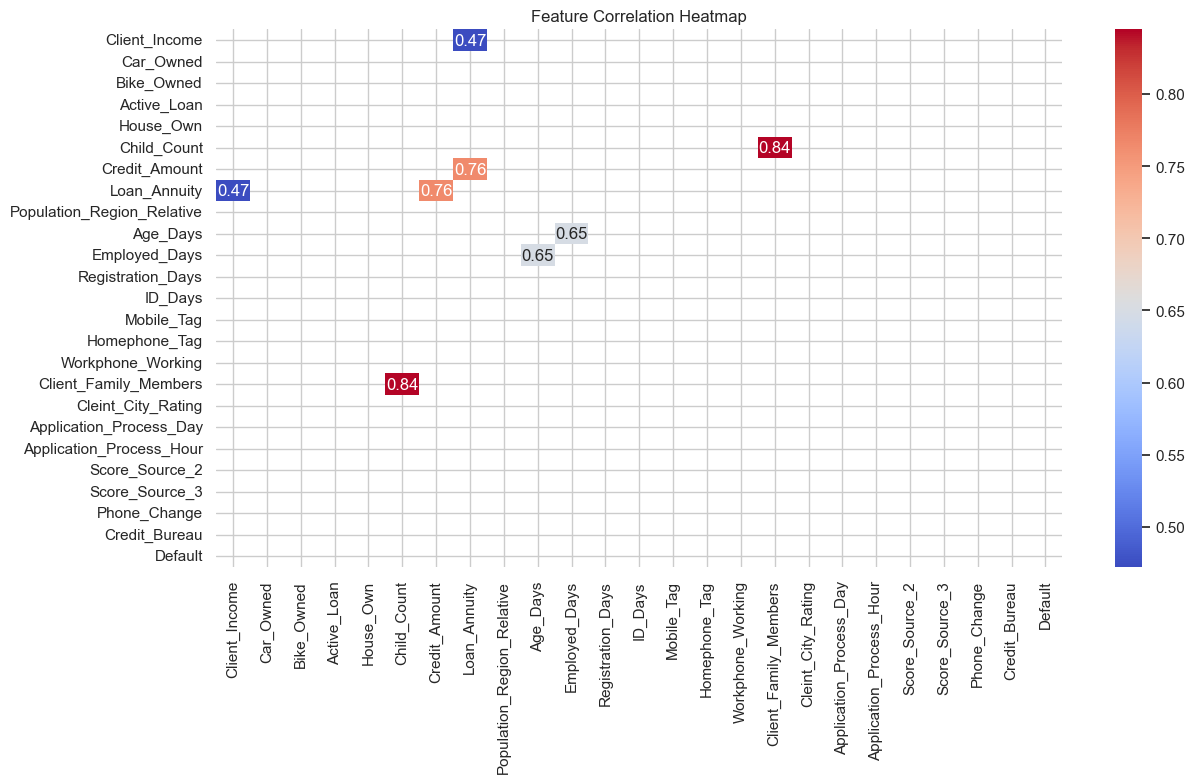

In [198]:
# FIGURE OUT HIGHLY CO-RELATED COLUMNS 


high_corr = corr[((corr>0.4) | (corr <-0.4)) & (corr != 1)]
plt.figure(figsize=(13, 8))  # Adjust size here as needed
sns.heatmap(high_corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
high_corr

<Axes: xlabel='Client_Income', ylabel='Loan_Annuity'>

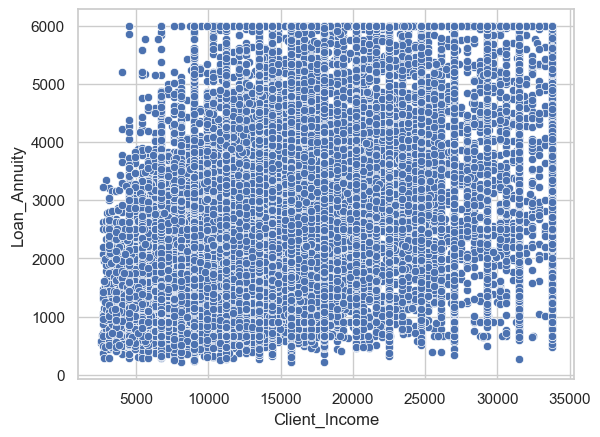

In [199]:
sns.scatterplot(data=user_data, x='Client_Income', y='Loan_Annuity')

<Axes: xlabel='Credit_Amount', ylabel='Loan_Annuity'>

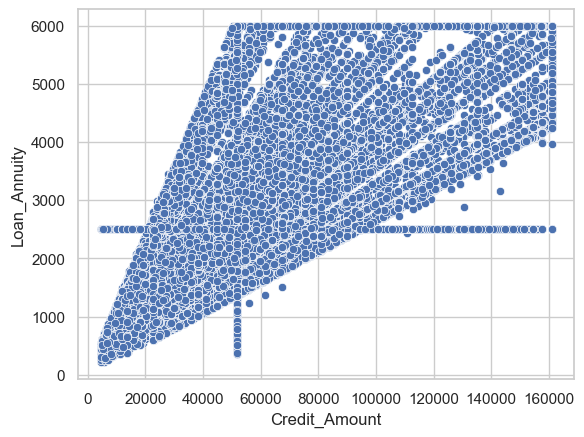

In [200]:
sns.scatterplot(data=user_data, x='Credit_Amount', y='Loan_Annuity')

<Axes: xlabel='Age_Days', ylabel='Employed_Days'>

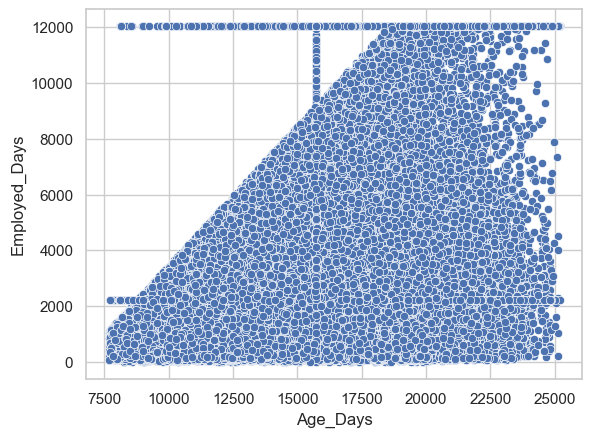

In [201]:
sns.scatterplot(data=user_data, x='Age_Days', y='Employed_Days')

In [202]:



user_data["Child_Count"].value_counts()

Child_Count
0.00    86472
1.00    23431
2.00    10294
2.50     1659
Name: count, dtype: int64

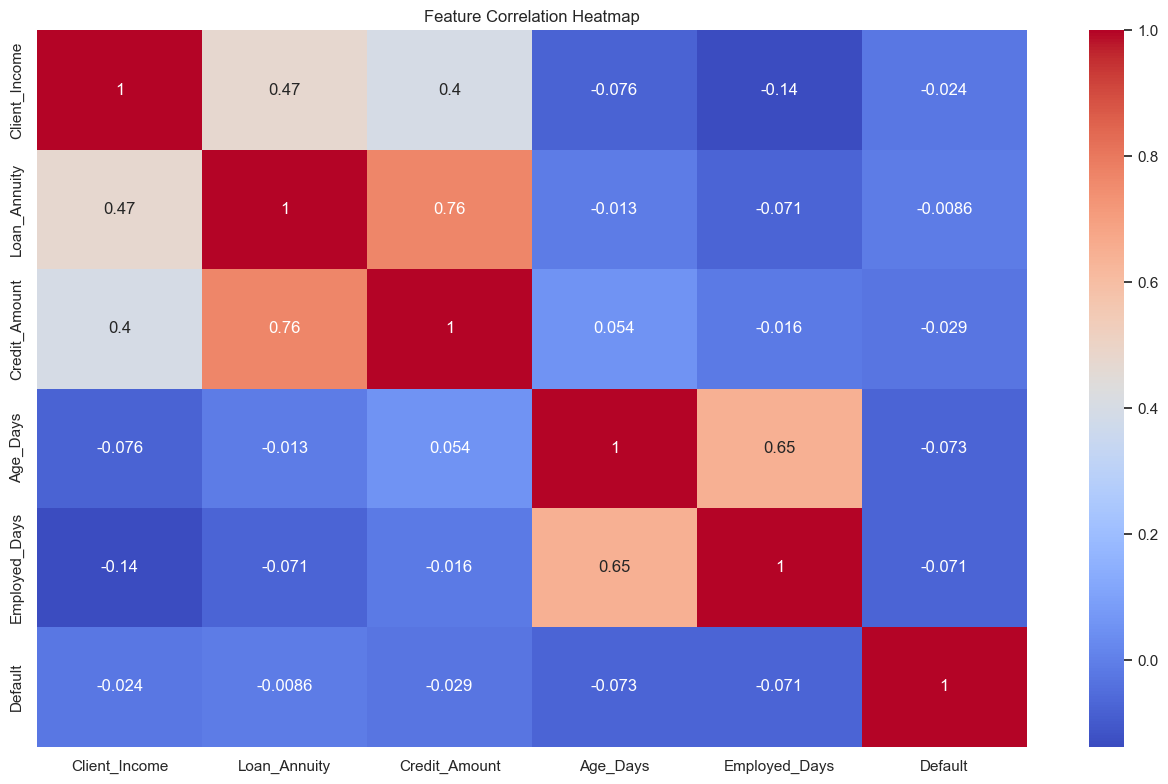

In [203]:
# Work on highly co-related columns

plt.figure(figsize=(13, 8))  # Adjust size here as needed
sns.heatmap(user_data[['Client_Income', 'Loan_Annuity', 'Credit_Amount', 'Age_Days', 'Employed_Days', 'Default']].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()



In [204]:
user_data[['Client_Income', 'Loan_Annuity', 'Credit_Amount', 'Age_Days', 'Employed_Days', 'Default']].corr()

Client_Income  Loan_Annuity  Credit_Amount  Age_Days  \
Client_Income           1.00          0.47           0.40     -0.08   
Loan_Annuity            0.47          1.00           0.76     -0.01   
Credit_Amount           0.40          0.76           1.00      0.05   
Age_Days               -0.08         -0.01           0.05      1.00   
Employed_Days          -0.14         -0.07          -0.02      0.65   
Default                -0.02         -0.01          -0.03     -0.07   

               Employed_Days  Default  
Client_Income          -0.14    -0.02  
Loan_Annuity           -0.07    -0.01  
Credit_Amount          -0.02    -0.03  
Age_Days                0.65    -0.07  
Employed_Days           1.00    -0.07  
Default                -0.07     1.00

In [205]:
# Our features are correlated with each other, not with the target. For tree-based models,we can keep all; for linear models, we can consider dropping one from each strongly correlated pair or apply regularization.

In [206]:
user_data.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_

In [207]:
# | Combination    | What it Means                  | Recommended Analysis / Plots                                                                                            |
# | -------------- | ------------------------------ | ---------------------------------------------------------------|
# | Num vs Num     | Two numerical features         |  Scatterplot, Correlation, Heatmap                           |
# | Num vs Cat     | Numerical + Categorical        |  Boxplot                                                     |
# | Cat vs Cat     | Two categorical features       |  pd.crosstab(cat1, cat2), Heatmap of crosstab                |


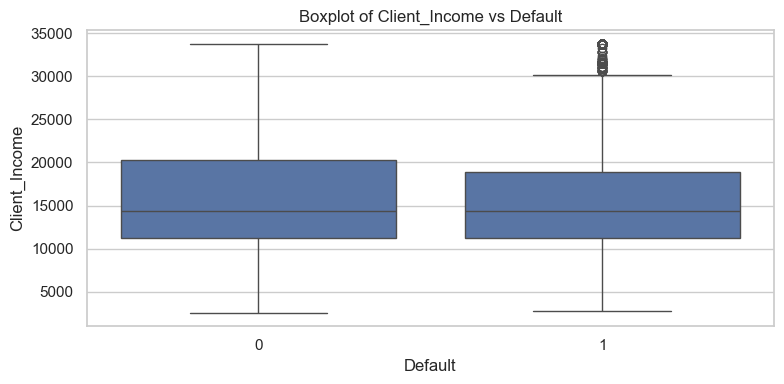

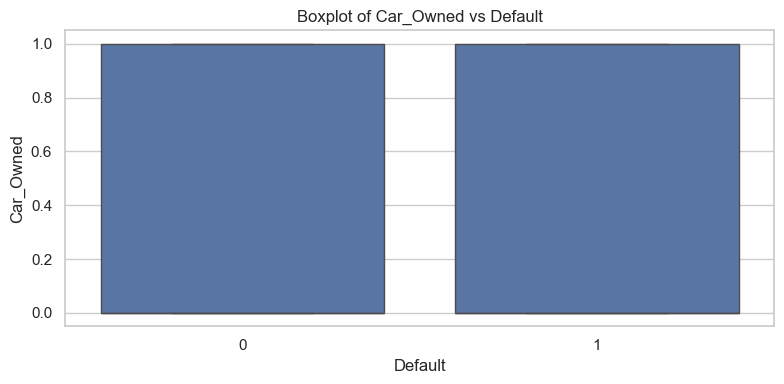

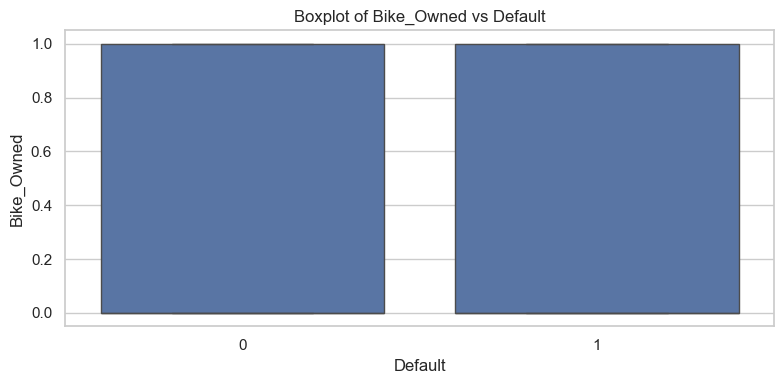

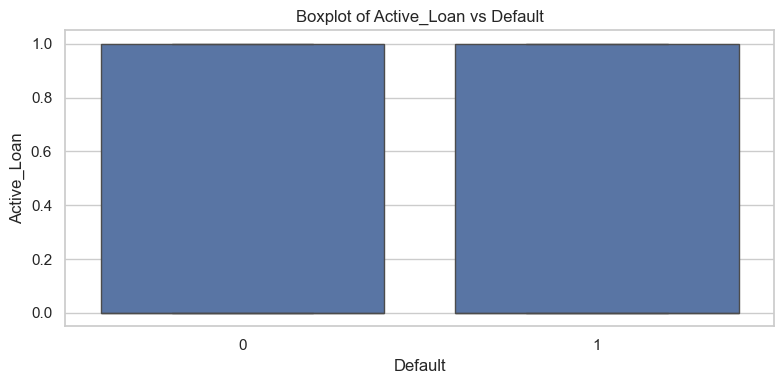

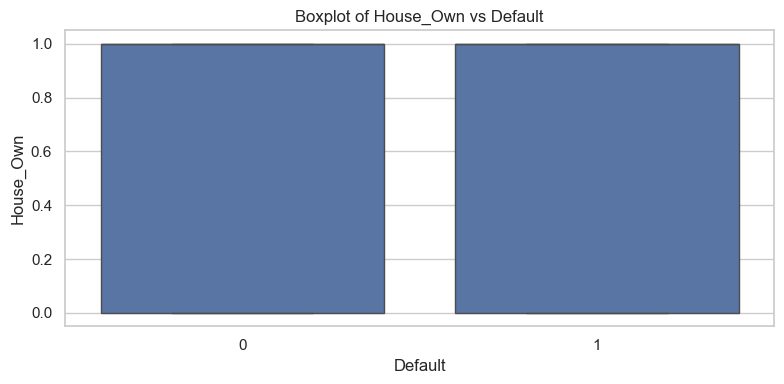

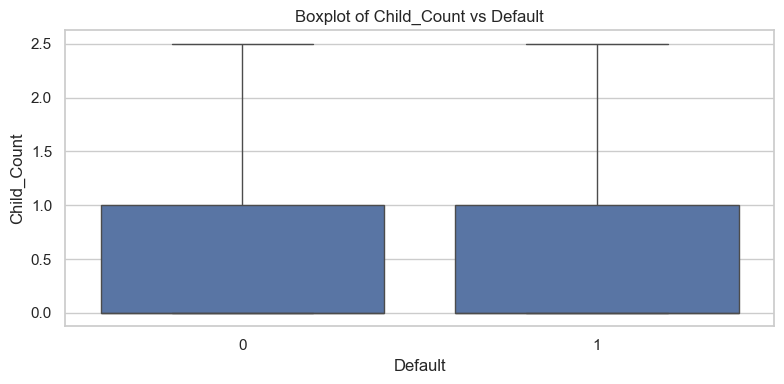

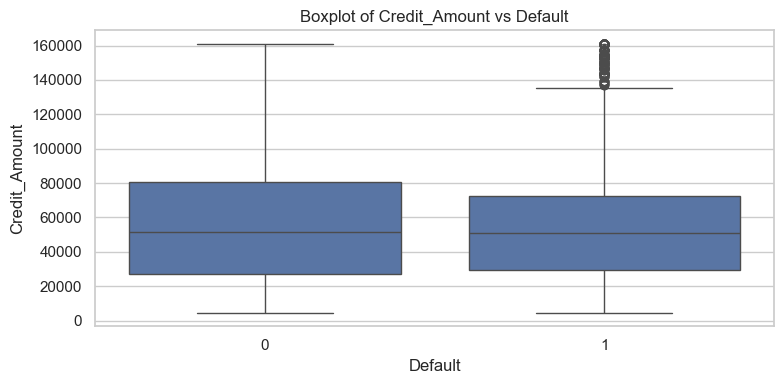

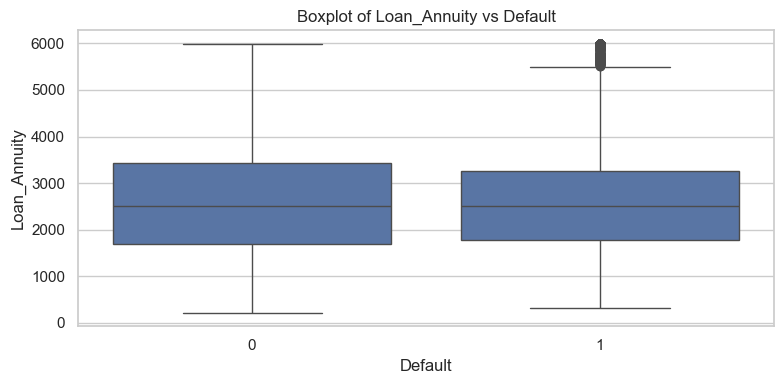

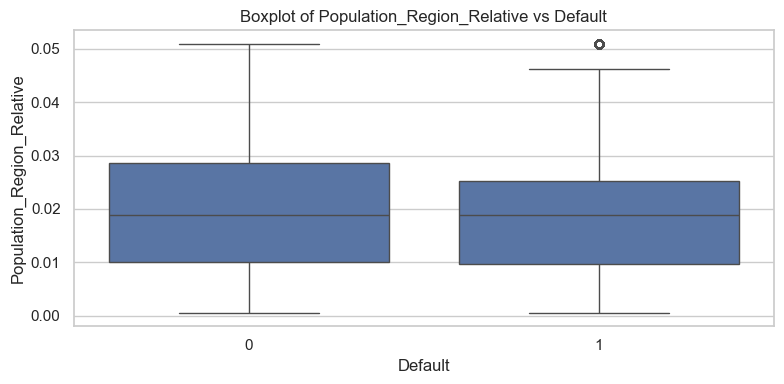

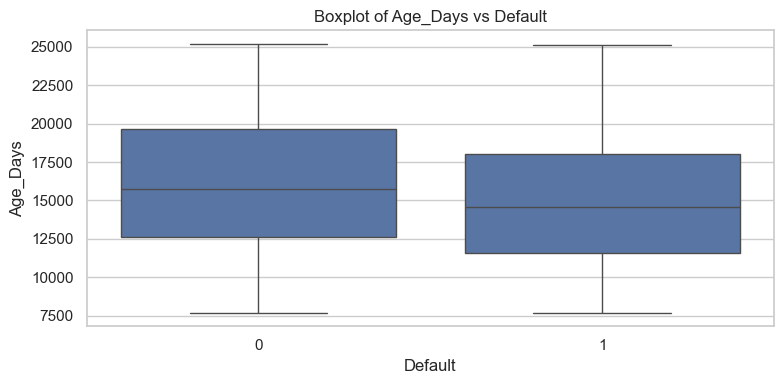

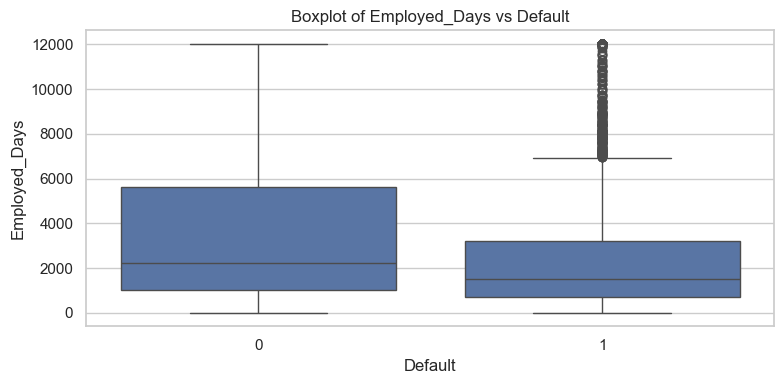

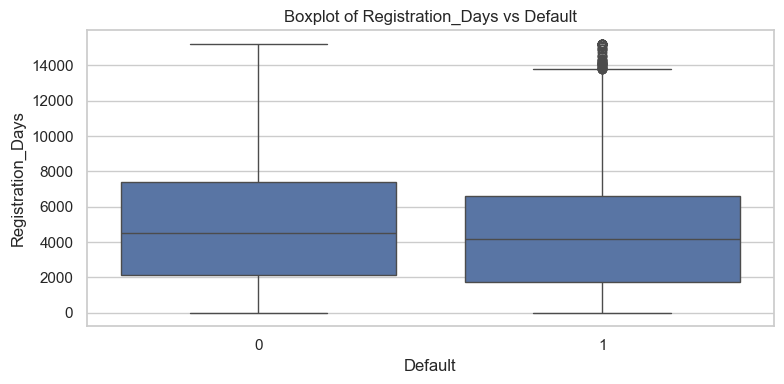

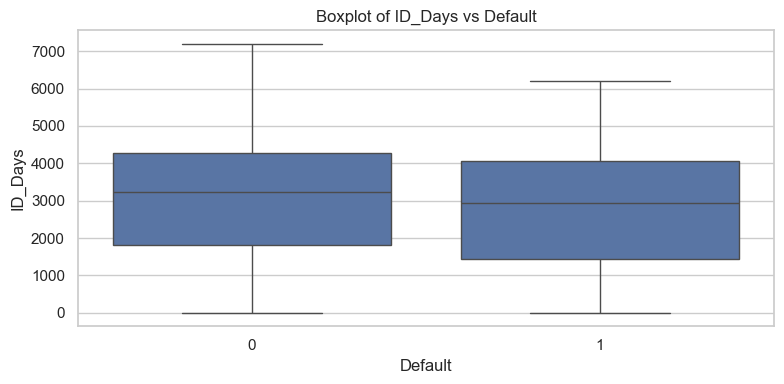

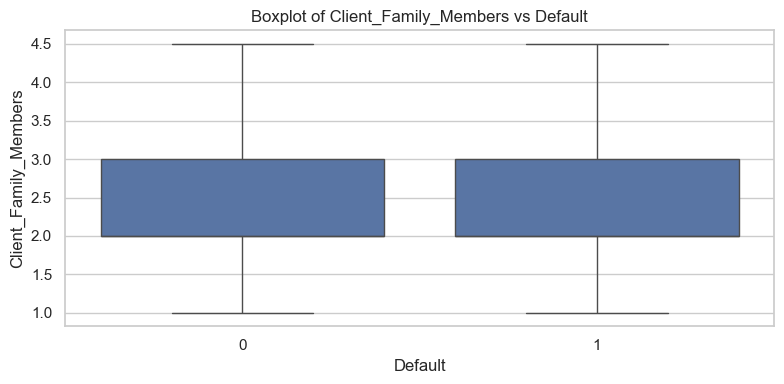

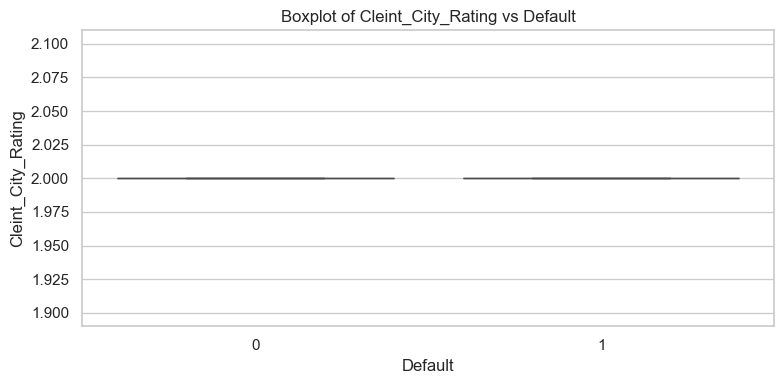

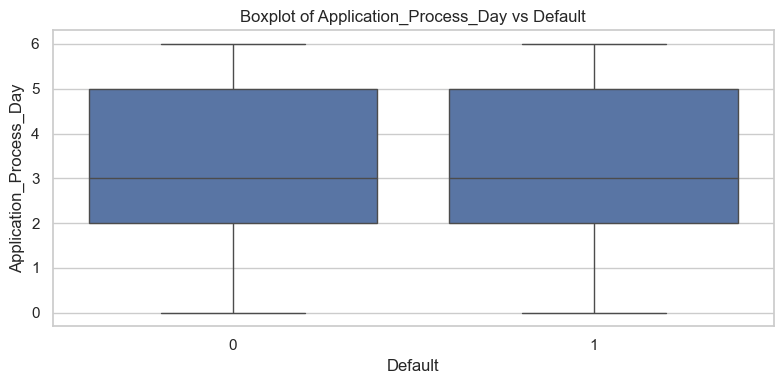

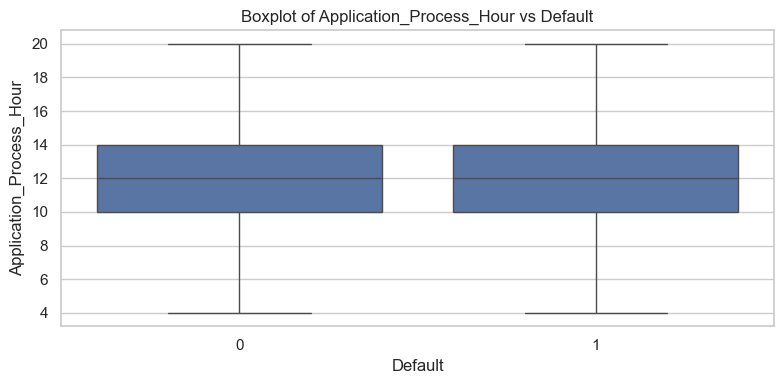

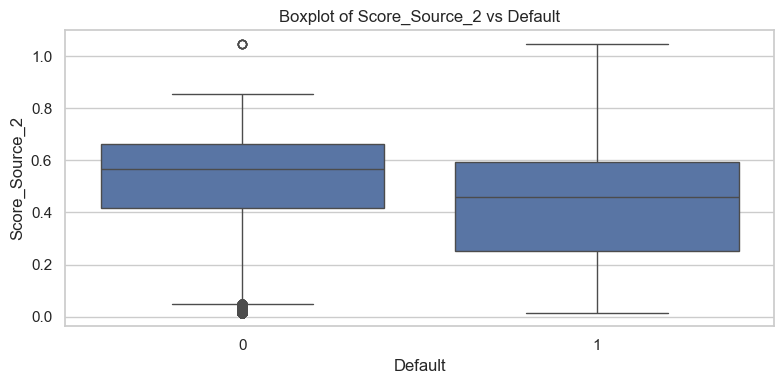

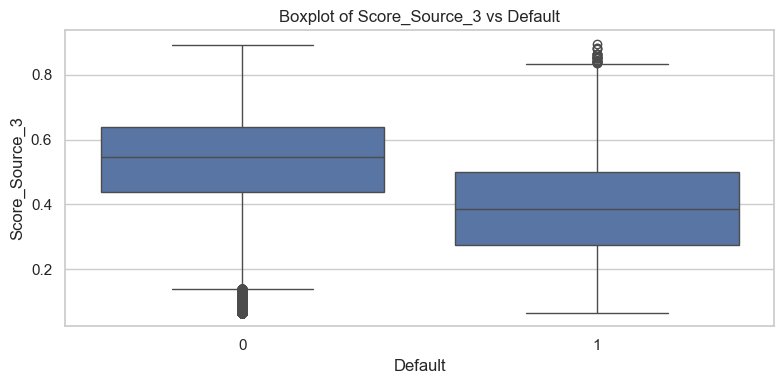

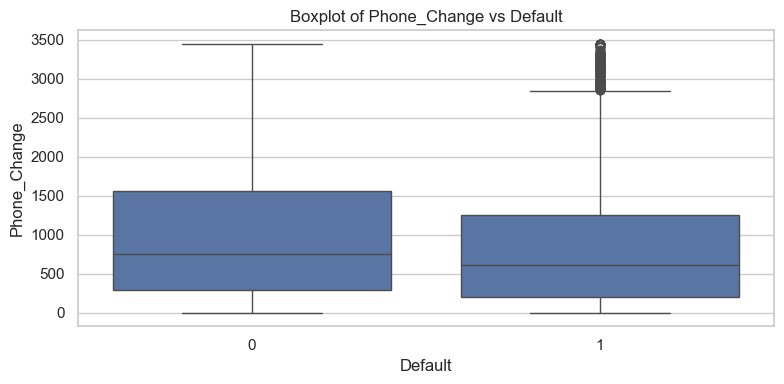

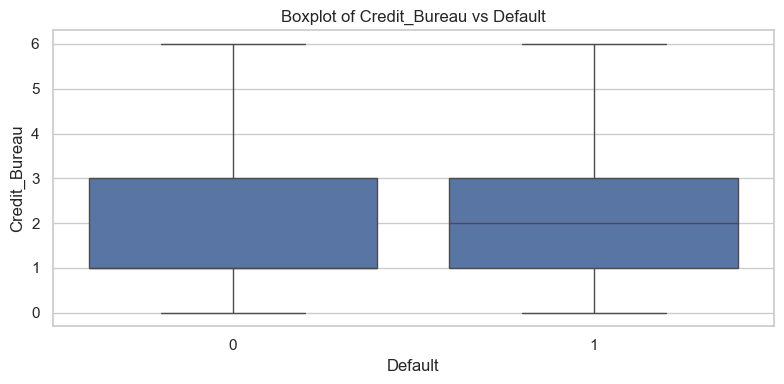

In [208]:
# Num vs Cat 


# Select only numeric columns (excluding the target)
numeric_cols = user_data.select_dtypes(include='float64').columns.drop('Default', errors='ignore')

sns.set(style="whitegrid")

# Create boxplots
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=user_data, x='Default', y=col)
    plt.title(f'Boxplot of {col} vs Default')
    plt.tight_layout()
    plt.show()

In [209]:
# Deafult output label is getting influneced by following input features:
# 1. Age_days
# 2. Employee_days
# 3. Score_Source2
# 4. Score_Source3
# 5. Phone_change

In [210]:
# | Cat vs Cat     | Two categorical features       |  pd.crosstab(cat1, cat2), Heatmap of crosstab                |


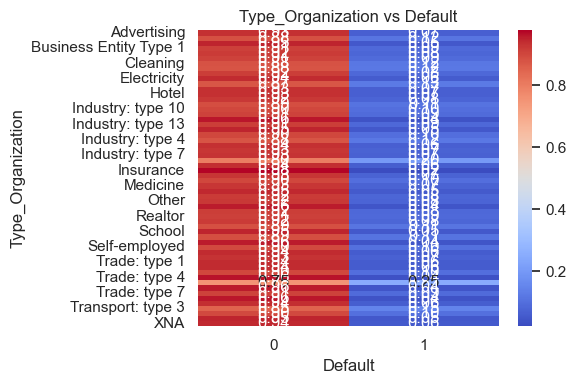

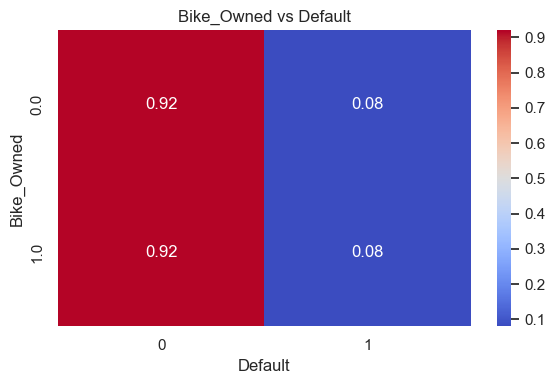

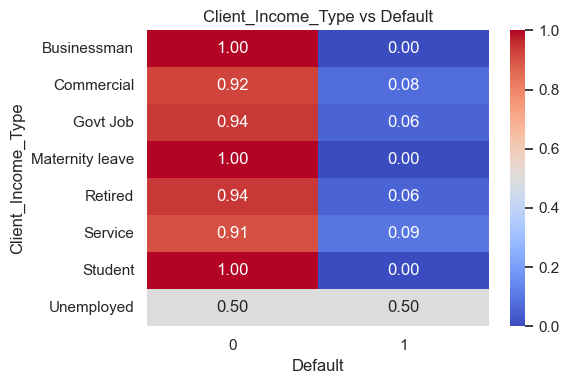

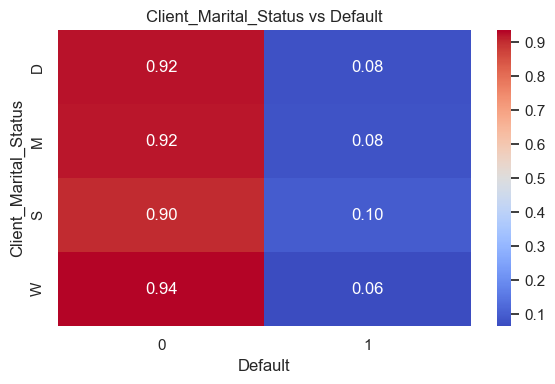

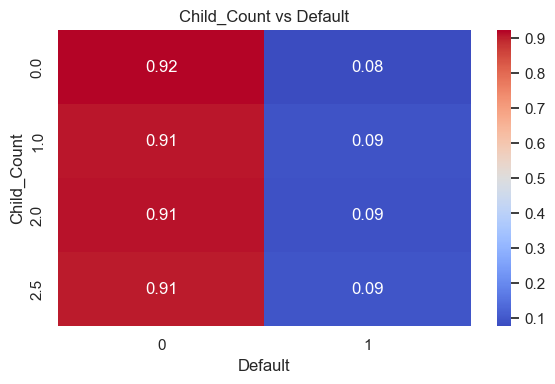

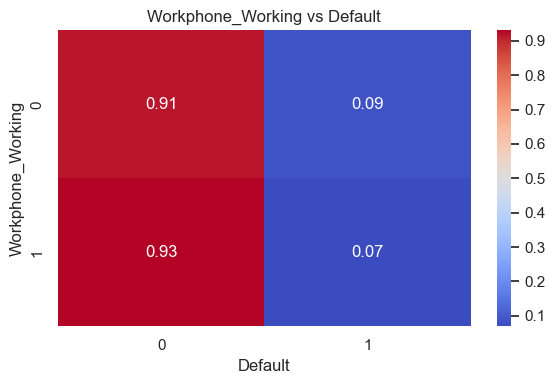

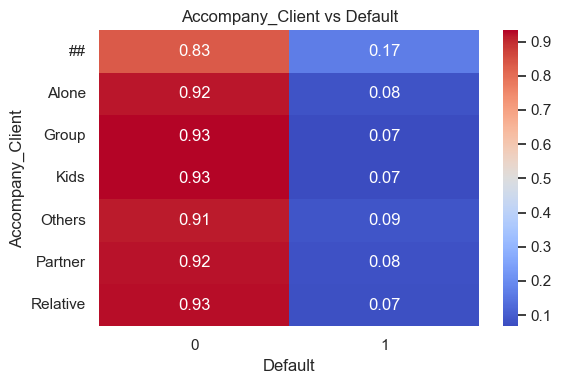

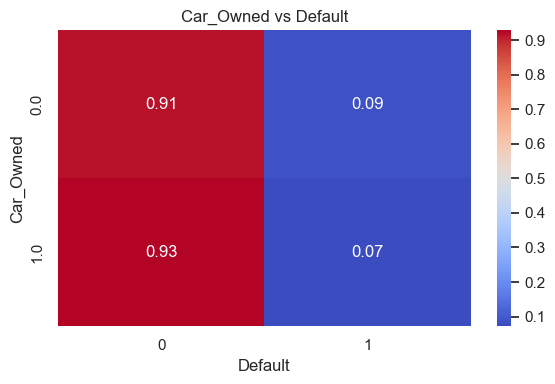

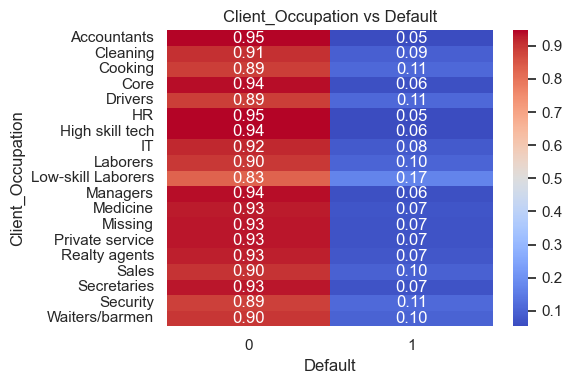

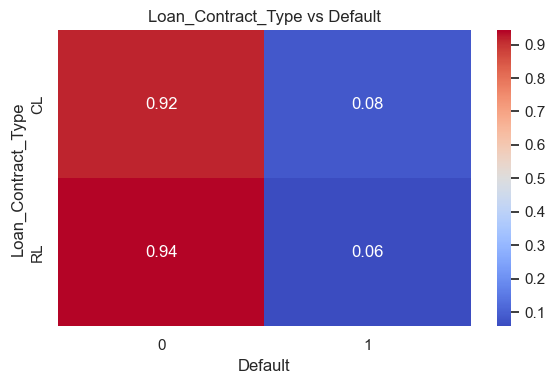

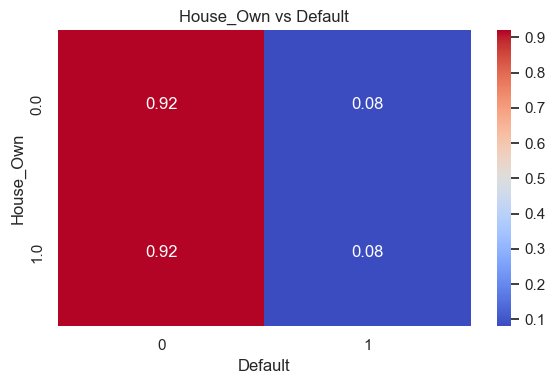

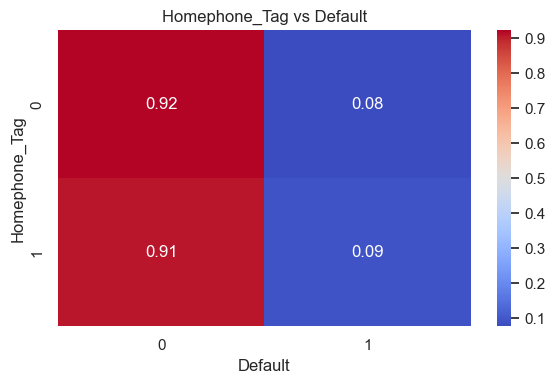

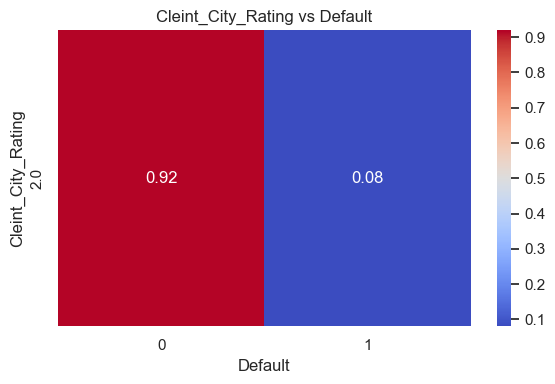

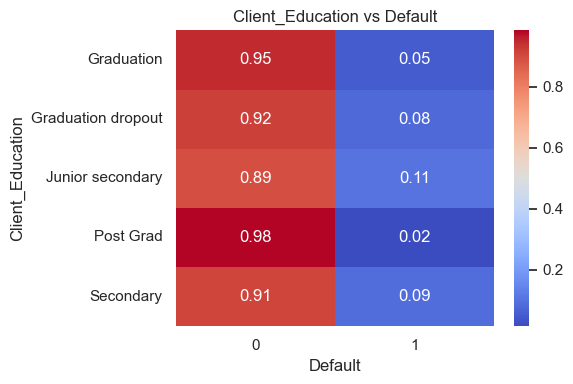

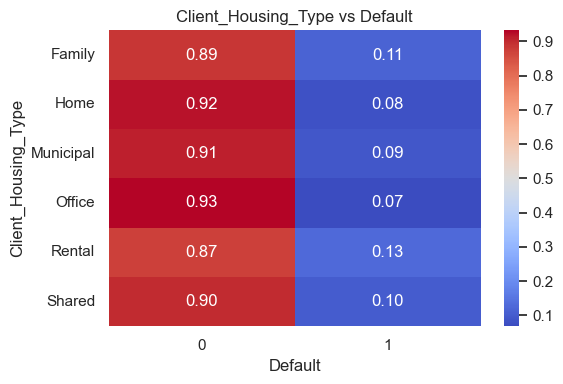

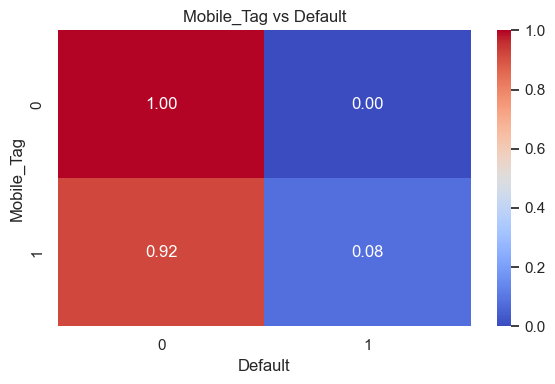

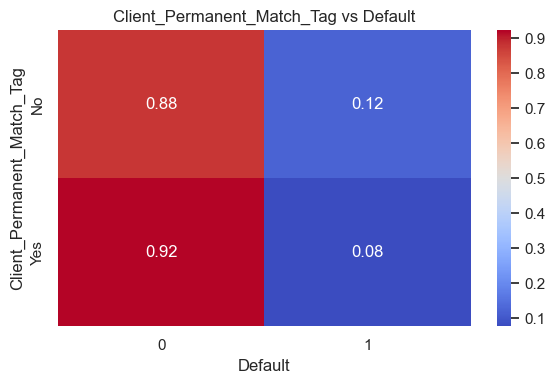

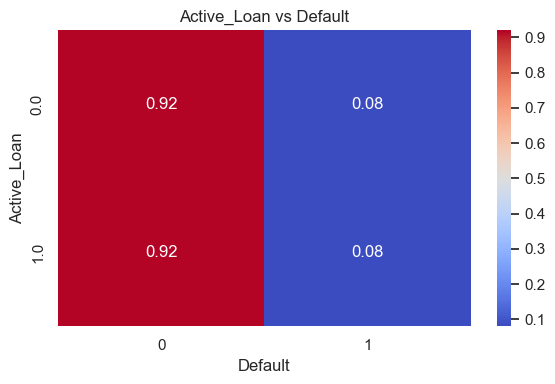

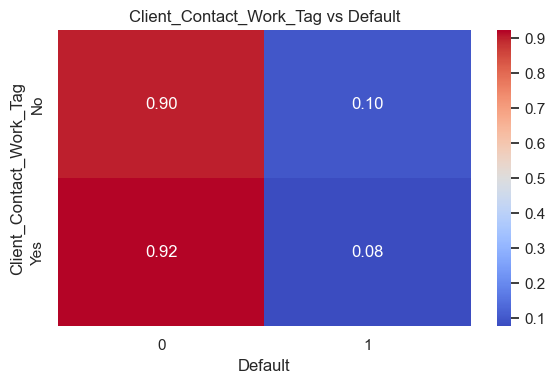

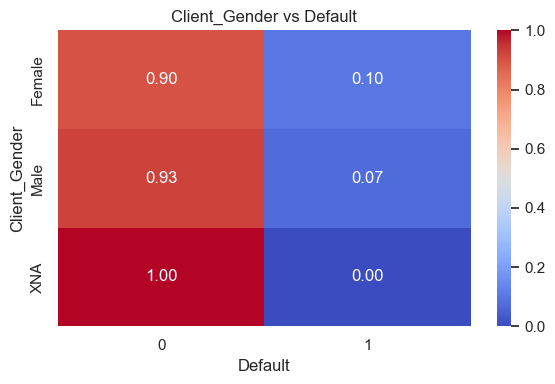

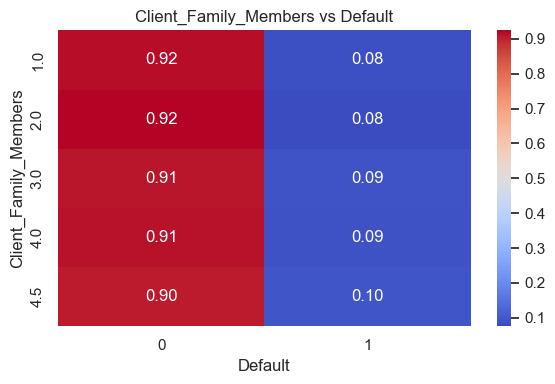

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your target column
target_col = 'Default'

# Select categorical and binary categorical-like columns (excluding target)
cat_cols = user_data.select_dtypes(include='object').columns.tolist()
binary_cols = [col for col in user_data.select_dtypes(include='number').columns 
               if user_data[col].nunique() <= 5 and col != target_col]
cat_cols += binary_cols
cat_cols = list(set(cat_cols))

# Generate heatmap for each categorical column vs target
for col in cat_cols:
    ctab = pd.crosstab(user_data[col], user_data[target_col], normalize='index')

    plt.figure(figsize=(6, 4))
    sns.heatmap(ctab, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'{col} vs {target_col}', fontsize=12)
    plt.ylabel(col)
    plt.xlabel(target_col)
    plt.tight_layout()
    plt.show()


In [212]:
# FEATURE ENGINEERING - IDEAS

# Client_Income / Credit_Amount	Create Income_to_Loan_Ratio
# Loan_Annuity / Credit_Amount	Create Installment_Rate
# Client_Income / Client_Family_Members	Create Per_Capita_Income
# Child_Count, Client_Family_Members	Create Has_Children = Child_Count > 0

# Is_Employed	Binary: Employed_Days > 0
# Employment_Percent_Life	(Years_Employed / Client_Age_Years) – % of working life


# Phone_Provided_Count	Sum of Mobile_Tag, Homephone_Tag, Workphone_Working
# Mobile_Tag - almost constant value, drop it
# Why other 2 seperately can be useful?:
# Clients who provide more contact info (home, mobile, work) may be lower risk.
# Clients with non-working numbers may be hiding or higher risk.

# Income_to_Region_Pop	Client_Income * Population_Region_Relative – proxies financial stress, might represent cost of living as well]


# Create and check boxplot of ythese with Default column

In [213]:
user_data['Income_to_Loan_Ratio'] = user_data['Client_Income']/user_data['Credit_Amount']

In [214]:
user_data[['Income_to_Loan_Ratio','Client_Income','Credit_Amount' ]].describe()

Income_to_Loan_Ratio  Client_Income  Credit_Amount
count             121856.00      121856.00      121856.00
mean                   0.39       16205.61       59125.55
std                    0.32        7233.59       37532.09
min                    0.03        2565.00        4500.00
25%                    0.19       11250.00       27450.00
50%                    0.30       14400.00       51750.00
75%                    0.48       20250.00       80865.00
max                    7.00       33750.00      160987.50

In [215]:
# sns.boxplot(user_data['Income_to_Loan_Ratio'])

<Axes: xlabel='Income_to_Loan_Ratio', ylabel='Count'>

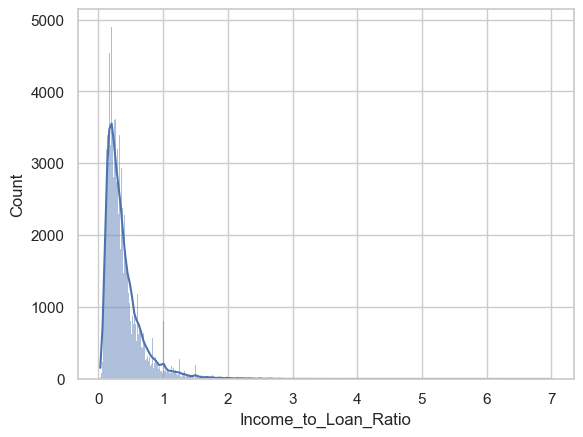

In [216]:
sns.histplot(user_data['Income_to_Loan_Ratio'], kde=True)

In [217]:
# outliers in user_data['Income_to_Loan_Ratio'], but we are planning to use tree based models so we wont get affected much

In [218]:
user_data['Installment_Rate'] = user_data['Loan_Annuity']/user_data['Credit_Amount']

<Axes: xlabel='Installment_Rate', ylabel='Count'>

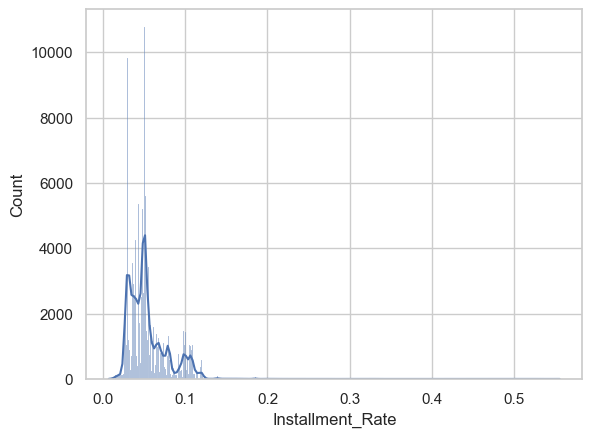

In [219]:
sns.histplot(user_data['Installment_Rate'], kde=True)

<Axes: ylabel='Installment_Rate'>

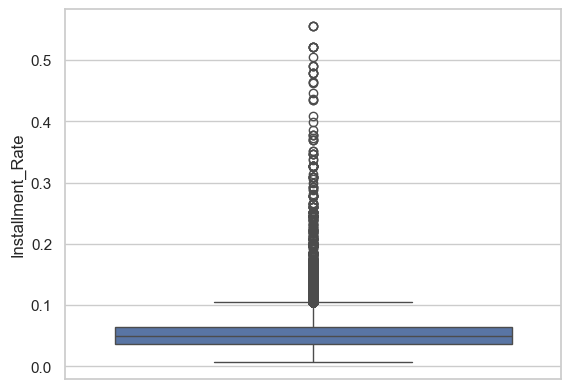

In [220]:
sns.boxplot(user_data['Installment_Rate'])

In [221]:
# Client_Income / Family_Members	Create Per_Capita_Income
user_data['Per_Capita_Income'] = user_data['Client_Income']/user_data['Client_Family_Members']

<Axes: xlabel='Per_Capita_Income', ylabel='Count'>

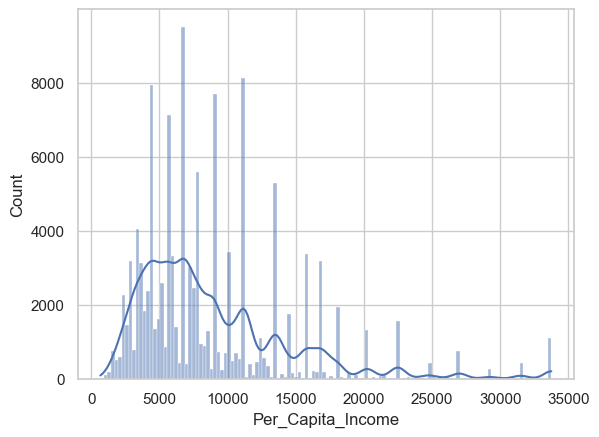

In [222]:
sns.histplot(user_data['Per_Capita_Income'], kde=True)

<Axes: ylabel='Per_Capita_Income'>

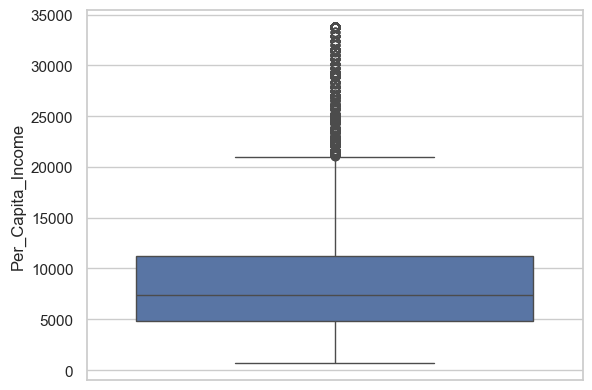

In [223]:
sns.boxplot(user_data['Per_Capita_Income'])

In [224]:
# Integer (0 or 1)
user_data['Has_Children'] = (user_data['Child_Count'] > 0).astype(int)
user_data['Is_Single_Parent'] = ((user_data['Has_Children'] == 1) & (user_data['Client_Family_Members'] <= 2)).astype(int)


In [225]:
user_data['Is_Single_Parent'].value_counts()

Is_Single_Parent
0    117112
1      4744
Name: count, dtype: int64

In [226]:
user_data['Has_Children'].value_counts()

Has_Children
0    86472
1    35384
Name: count, dtype: int64

In [227]:
ctab = pd.crosstab(user_data['Is_Single_Parent'], user_data['Default'], normalize='index')
ctab


Default             0    1
Is_Single_Parent          
0                0.92 0.08
1                0.90 0.10

In [228]:
ctab = pd.crosstab(user_data['Has_Children'], user_data['Default'], normalize='index')
ctab


Default         0    1
Has_Children          
0            0.92 0.08
1            0.91 0.09

In [229]:
# From crosstab, it looks like "Is_Single_Parent"==1 has more Default

In [230]:
# Is_Employed	Binary: Employed_Days < 0
user_data['Is_Employed'] = user_data['Employed_Days']>0

In [231]:
user_data['Is_Employed'].value_counts()

Is_Employed
True     121854
False         2
Name: count, dtype: int64

In [232]:
# makes no sense to keep it, 99% rows shows employed

In [233]:
user_data.drop(columns='Is_Employed', inplace=True)

In [234]:
# Employment_Percent_Life	(Years_Employed / Client_Age_Years) – % of working life

user_data['Employment_Percent_Life'] = user_data['Employed_Days']/user_data['Age_Days']

In [235]:
user_data['Employment_Percent_Life'].describe()

count   121856.00
mean         0.23
std          0.20
min          0.00
25%          0.07
50%          0.15
75%          0.35
max          1.48
Name: Employment_Percent_Life, dtype: float64

<Axes: ylabel='Employment_Percent_Life'>

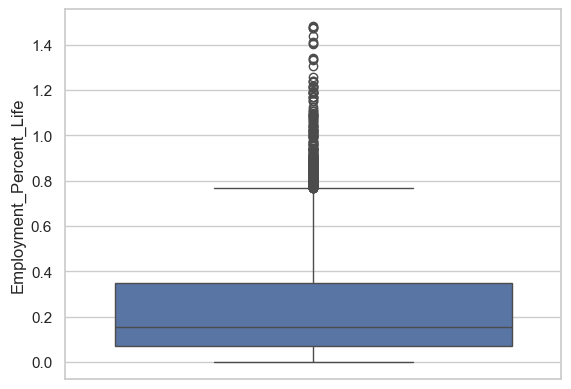

In [236]:
sns.boxplot(user_data['Employment_Percent_Life'])

<Axes: xlabel='Employment_Percent_Life', ylabel='Count'>

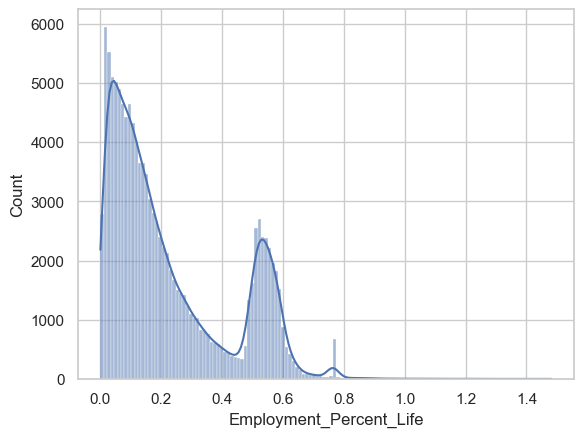

In [237]:
sns.histplot(user_data['Employment_Percent_Life'],kde=True)

In [238]:
user_data[['Mobile_Tag']].value_counts()

# no point in keeping this col, drop it

user_data.drop(columns='Mobile_Tag',inplace=True)

In [239]:
user_data['Income_to_Region_Pop'] = user_data['Client_Income'] * user_data['Population_Region_Relative']


In [240]:
user_data['Income_to_Region_Pop'].describe()

count   121856.00
mean       340.99
std        302.81
min          1.92
25%        137.51
50%        254.47
75%        423.07
max       1718.95
Name: Income_to_Region_Pop, dtype: float64

<Axes: xlabel='Income_to_Region_Pop', ylabel='Count'>

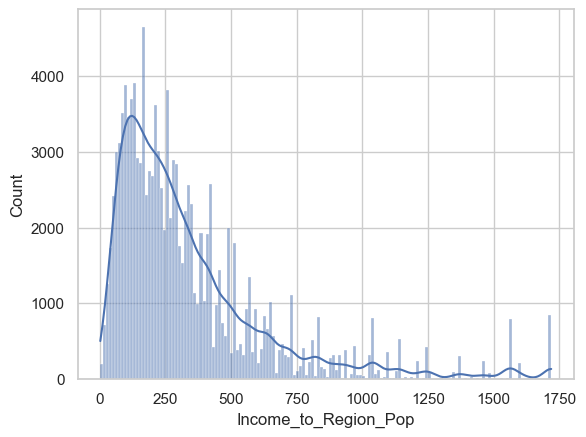

In [241]:
sns.histplot(user_data['Income_to_Region_Pop'],kde=True) 

In [242]:
# Feature creation is done

In [243]:
user_data.corr(numeric_only=True)['Default']

Client_Income                -0.02
Car_Owned                    -0.02
Bike_Owned                    0.00
Active_Loan                   0.00
House_Own                    -0.00
Child_Count                   0.02
Credit_Amount                -0.03
Loan_Annuity                 -0.01
Population_Region_Relative   -0.03
Age_Days                     -0.07
Employed_Days                -0.07
Registration_Days            -0.04
ID_Days                      -0.05
Homephone_Tag                 0.02
Workphone_Working            -0.03
Client_Family_Members         0.01
Cleint_City_Rating             NaN
Application_Process_Day       0.01
Application_Process_Hour     -0.02
Score_Source_2               -0.15
Score_Source_3               -0.21
Phone_Change                 -0.05
Credit_Bureau                 0.04
Default                       1.00
Income_to_Loan_Ratio         -0.01
Installment_Rate              0.01
Per_Capita_Income            -0.02
Has_Children                  0.02
Is_Single_Parent    

In [244]:
# We can drop few columns now as we have created features out of them
cols_to_drop = [
    'Child_Count',                  # encoded as Has_Children
    'Client_Family_Members',        # encoded in Per_Capita_Income
    'Loan_Annuity',                 # used in Installment_Rate
    'Credit_Amount',                # used in Income_to_Loan and Installment_Rate
]


In [245]:
user_data.drop(columns=cols_to_drop,inplace=True)   

In [246]:
# Categorical columns needs to be converted to numeric to train ML model.
# Apply One hot encoding/label encoding accordingly

In [247]:
user_data.select_dtypes(include="object").sample(5)

Accompany_Client Client_Income_Type    Client_Education  \
24619            Alone            Service           Secondary   
34342            Alone            Service           Secondary   
57480            Alone         Commercial  Graduation dropout   
72686            Alone            Service           Secondary   
3061          Relative            Retired          Graduation   

      Client_Marital_Status Client_Gender Loan_Contract_Type  \
24619                     W        Female                 CL   
34342                     M          Male                 CL   
57480                     M        Female                 CL   
72686                     D        Female                 CL   
3061                      W          Male                 CL   

      Client_Housing_Type   Client_Occupation Client_Permanent_Match_Tag  \
24619                Home  Low-skill Laborers                        Yes   
34342           Municipal     High skill tech                        Yes   
57480                Home     High skill tech                        Yes   
72686                Home            Laborers                        Yes   
3061            Municipal             Missing                        Yes   

      Client_Contact_Work_Tag       Type_Organization  
24619                      No            Construction  
34342                     Yes           Trade: type 6  
57480                     Yes  Business Entity Type 1  
72686                     Yes                 Housing  
3061                      Yes                     XNA

In [248]:
print(user_data['Accompany_Client'].value_counts(normalize=True))
mode_Accompany_Client =  user_data['Accompany_Client'].mode()[0]
user_data['Accompany_Client'] = user_data['Accompany_Client'].apply(lambda x:mode_Accompany_Client if x=="##" else x )
print(user_data['Accompany_Client'].value_counts(normalize=True))


Accompany_Client
Alone      0.81
Relative   0.13
Partner    0.04
Kids       0.01
Others     0.01
Group      0.00
##         0.00
Name: proportion, dtype: float64
Accompany_Client
Alone      0.81
Relative   0.13
Partner    0.04
Kids       0.01
Others     0.01
Group      0.00
Name: proportion, dtype: float64


In [249]:


user_data['Accompany_Client'] = user_data['Accompany_Client'].apply(lambda x : 0 if x =='Alone' else 1)
user_data['Accompany_Client'].value_counts(normalize=True)

Accompany_Client
0   0.81
1   0.19
Name: proportion, dtype: float64

In [250]:
# Keep it in your first model build.
# After training, check feature importance

In [251]:
user_data['Client_Income_Type'].value_counts()

Client_Income_Type
Service            64729
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: count, dtype: int64

In [252]:
user_data.groupby('Client_Income_Type')['Default'].mean()

Client_Income_Type
Businessman       0.00
Commercial        0.08
Govt Job          0.06
Maternity leave   0.00
Retired           0.06
Service           0.09
Student           0.00
Unemployed        0.50
Name: Default, dtype: float64

In [253]:
rare_income_types = ['Student', 'Maternity leave', 'Businessman']

user_data['Client_Income_Type'] = user_data['Client_Income_Type'].replace(rare_income_types,'Others')
user_data['Client_Income_Type'].value_counts()


Client_Income_Type
Service       64729
Commercial    27764
Retired       21043
Govt Job       8303
Others           11
Unemployed        6
Name: count, dtype: int64

In [254]:
user_data['Client_Education'].value_counts()
# apply one hot encoding for all these cat types, low cardinality

Client_Education
Secondary             87556
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: count, dtype: int64

In [255]:
user_data['Client_Marital_Status'].value_counts()
# one hot encoding, keep all drop first

Client_Marital_Status
M    90822
S    17404
D     7556
W     6074
Name: count, dtype: int64

In [256]:
user_data.groupby('Client_Marital_Status')['Default'].mean()

Client_Marital_Status
D   0.08
M   0.08
S   0.10
W   0.06
Name: Default, dtype: float64

In [257]:
user_data[user_data['Client_Gender']=='XNA']

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
17034       13500.00       0.00        0.00         1.00       1.00   
30820       15750.00       0.00        0.00         1.00       1.00   
68760       24750.00       1.00        0.00         0.00       1.00   

       Accompany_Client Client_Income_Type    Client_Education  \
17034                 0            Service           Secondary   
30820                 1            Service           Secondary   
68760                 0         Commercial  Graduation dropout   

      Client_Marital_Status Client_Gender Loan_Contract_Type  \
17034                     M           XNA                 RL   
30820                     M           XNA                 RL   
68760                     M           XNA                 RL   

      Client_Housing_Type  Population_Region_Relative  Age_Days  \
17034                Home                        0.04  10647.00   
30820                Home                        0.03  13717.00   
68760                Home                        0.02   9649.00   

       Employed_Days  Registration_Days  ID_Days  Homephone_Tag  \
17034        1228.00             183.00  1671.00              1   
30820        2797.00            2241.00  4659.00              1   
68760        2293.00            4099.00  2326.00              1   

       Workphone_Working   Client_Occupation  Cleint_City_Rating  \
17034                  1                Core                2.00   
30820                  1  Low-skill Laborers                2.00   
68760                  1             Missing                2.00   

       Application_Process_Day  Application_Process_Hour  \
17034                     4.00                     15.00   
30820                     5.00                     16.00   
68760                     5.00                     15.00   

      Client_Permanent_Match_Tag Client_Contact_Work_Tag Type_Organization  \
17034                        Yes                     Yes      Kindergarten   
30820                        Yes                     Yes  Industry: type 3   
68760                        Yes                     Yes          Medicine   

       Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  Default  \
17034            0.66            0.08        851.00           3.00        0   
30820            0.71            0.31        493.00           4.00        0   
68760            0.66            0.36       1681.00           6.00        0   

       Income_to_Loan_Ratio  Installment_Rate  Per_Capita_Income  \
17034                  0.33              0.05            4500.00   
30820                  0.58              0.05            3937.50   
68760                  0.46              0.05           12375.00   

       Has_Children  Is_Single_Parent  Employment_Percent_Life  \
17034             1                 0                     0.12   
30820             1                 0                     0.20   
68760             0                 0                     0.24   

       Income_to_Region_Pop  
17034                483.19  
30820                415.67  
68760                466.54

In [258]:
user_data['Client_Gender'] = user_data['Client_Gender'].apply(lambda x : user_data['Client_Gender'].mode()[0] if x =='XNA' else x)

In [259]:
user_data['Client_Gender'].value_counts()
# apply one hot encoding now

Client_Gender
Male      80879
Female    40977
Name: count, dtype: int64

In [260]:
user_data.groupby('Client_Gender')['Default'].mean()

Client_Gender
Female   0.10
Male     0.07
Name: Default, dtype: float64

In [261]:
user_data['Loan_Contract_Type'].value_counts()

Loan_Contract_Type
CL    110769
RL     11087
Name: count, dtype: int64

In [262]:
user_data.groupby('Loan_Contract_Type')['Default'].mean()

Loan_Contract_Type
CL   0.08
RL   0.06
Name: Default, dtype: float64

In [263]:
user_data['Client_Housing_Type'].value_counts()

Client_Housing_Type
Home         108557
Family         5783
Municipal      4248
Rental         1816
Office         1002
Shared          450
Name: count, dtype: int64

In [264]:
user_data.groupby('Client_Housing_Type')['Default'].mean().sort_values()

Client_Housing_Type
Office      0.07
Home        0.08
Municipal   0.09
Shared      0.10
Family      0.11
Rental      0.13
Name: Default, dtype: float64

In [265]:
def plot_values_count(col):
    plt.figure(figsize=(20, 8))
    value_counts = user_data[col].value_counts(normalize=False)
    value_perc = user_data[col].value_counts(normalize=True) * 100

    sns.barplot(y=value_counts.index, x=value_counts.values, orient='h')

    for i, (count, perc) in enumerate(zip(value_counts.values, value_perc.values)):
        plt.text(count + 100, i, f'{count} ({perc:.1f}%)', va='center')

    plt.ylabel(col)
    plt.xlabel("Count")
    plt.title(f"Value Counts of {col}")
    plt.tight_layout()
    plt.show()


def plot_col_vs_default_rate(col):
    plt.figure(figsize=(20, 12))
    default_rate = user_data.groupby(col)['Default'].mean().sort_values(ascending=True)

    sns.barplot(y=default_rate.index, x=default_rate.values, orient='h')

    for i, val in enumerate(default_rate.values):
        plt.text(val + 0.005, i, f'{val:.2%}', va='center')  # 2% formatting

    plt.xlabel("Default Rate")
    plt.ylabel(col)
    plt.title(f"Default Rate by {col}")
    plt.tight_layout()
    plt.show()




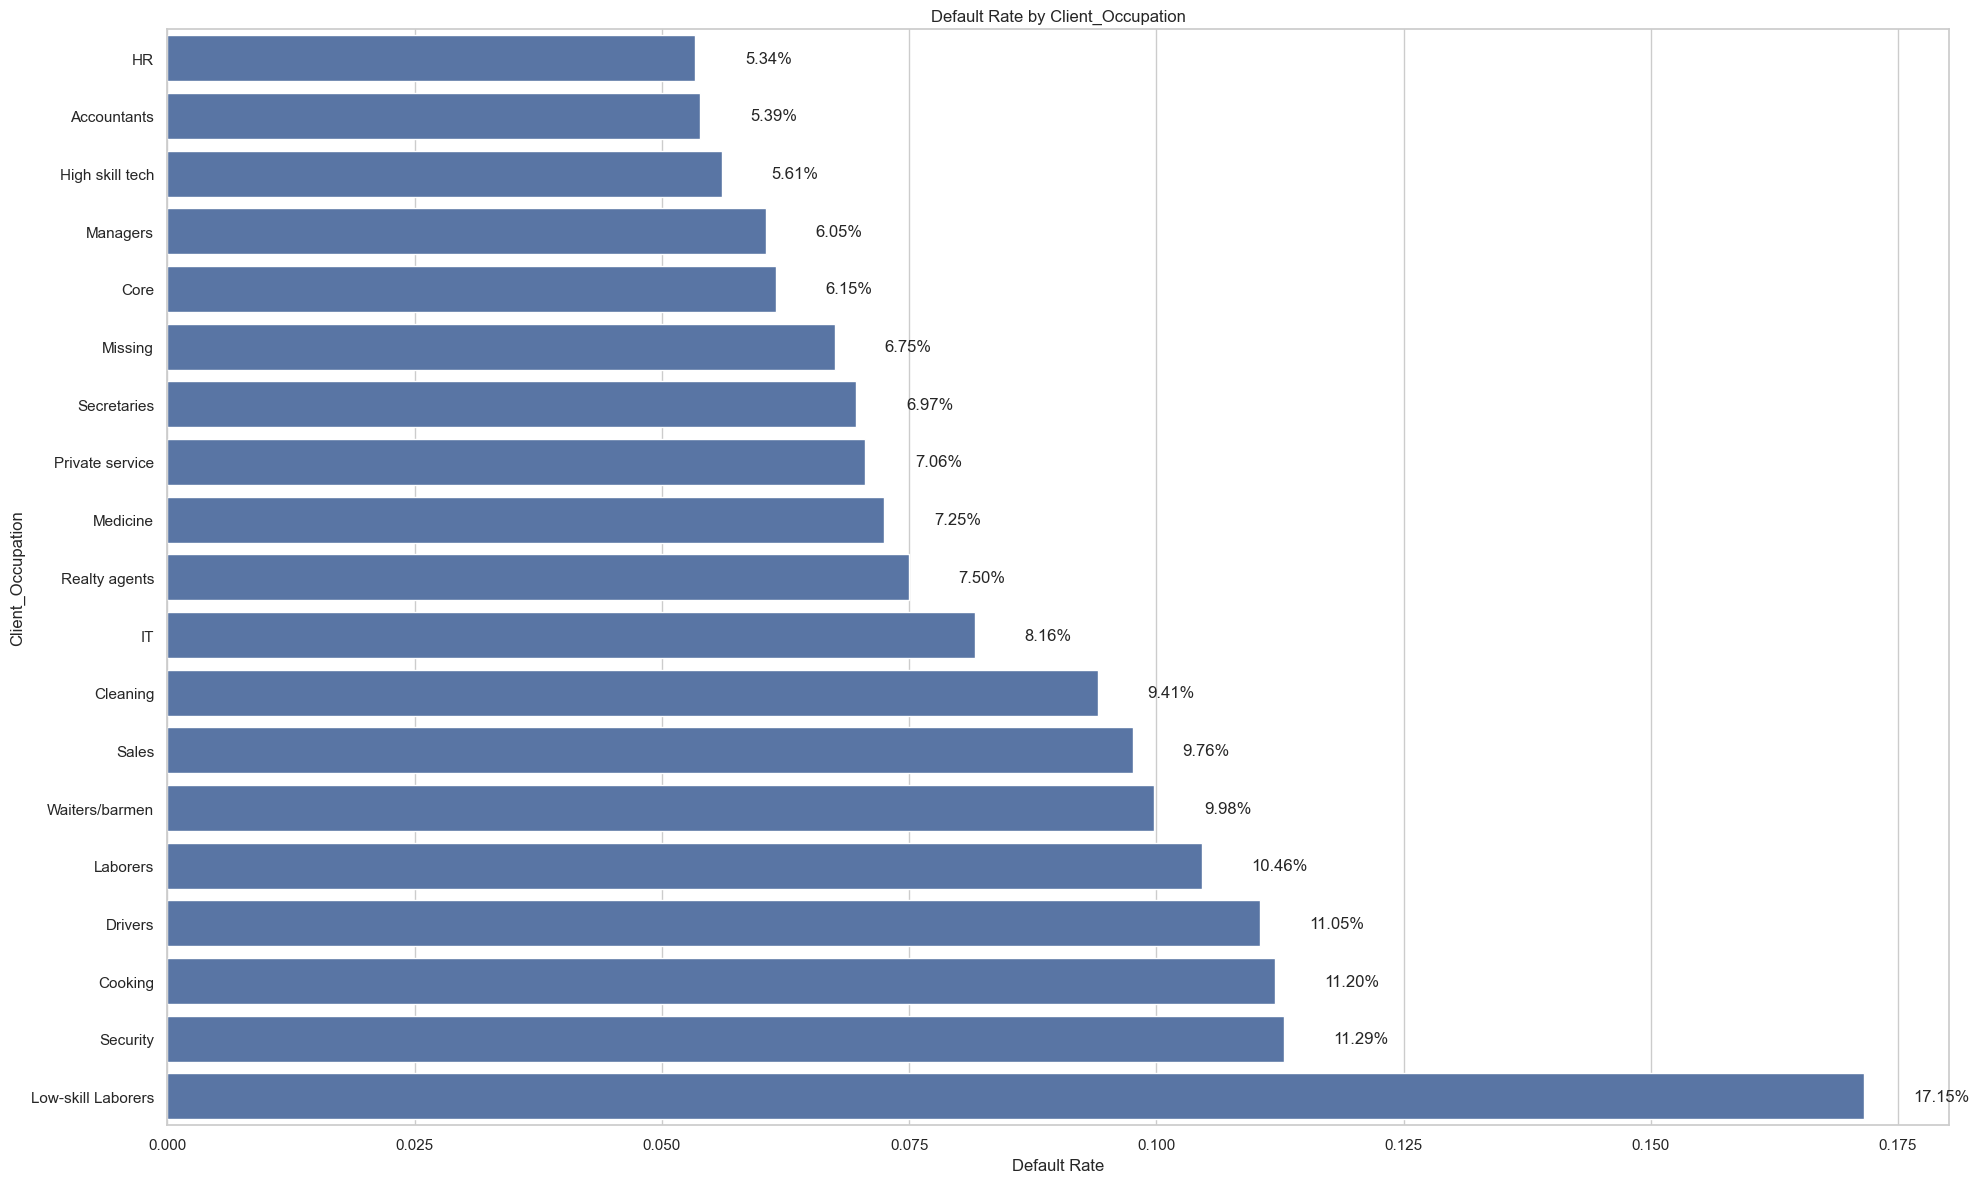

In [266]:
plot_col_vs_default_rate('Client_Occupation')

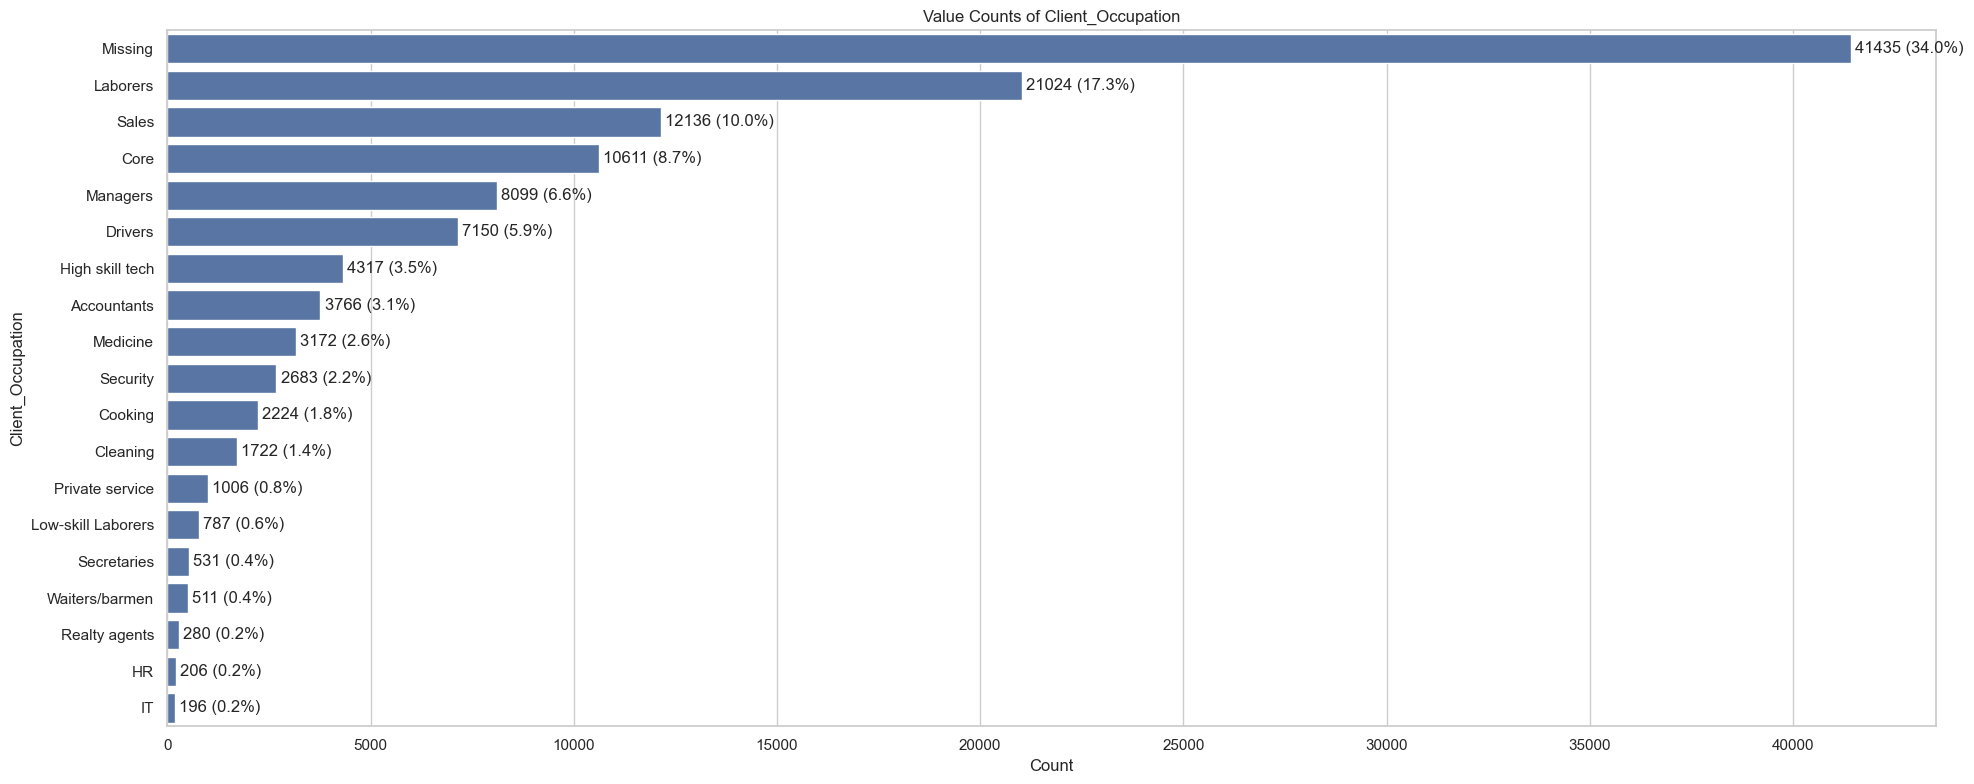

In [267]:
plot_values_count('Client_Occupation')

In [268]:
user_data['Client_Occupation'].value_counts(normalize=False)

Client_Occupation
Missing               41435
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64

In [269]:
user_data.groupby('Client_Occupation')['Default'].mean().sort_values(ascending=True)

Client_Occupation
HR                   0.05
Accountants          0.05
High skill tech      0.06
Managers             0.06
Core                 0.06
Missing              0.07
Secretaries          0.07
Private service      0.07
Medicine             0.07
Realty agents        0.07
IT                   0.08
Cleaning             0.09
Sales                0.10
Waiters/barmen       0.10
Laborers             0.10
Drivers              0.11
Cooking              0.11
Security             0.11
Low-skill Laborers   0.17
Name: Default, dtype: float64

In [270]:
def map_occupation_risk(occupation):
    low_risk = ['HR', 'Accountants', 'High skill tech', 'Managers', 'Core']
    medium_risk = ['Missing', 'Secretaries', 'Private service', 'Medicine', 'Realty agents',
                   'Laborers', 'IT', 'Cleaning', 'Sales', 'Waiters/barmen']
    high_risk = ['Drivers', 'Cooking', 'Security', 'Low-skill Laborers']
    
    if occupation in low_risk:
        return 'Low_Risk'
    elif occupation in medium_risk:
        return 'Medium_Risk'
    elif occupation in high_risk:
        return 'High_Risk'
    else:
        return 'Other'

user_data['Occupation_Risk_Level'] = user_data['Client_Occupation'].apply(map_occupation_risk)
user_data.drop(columns='Client_Occupation',inplace=True)


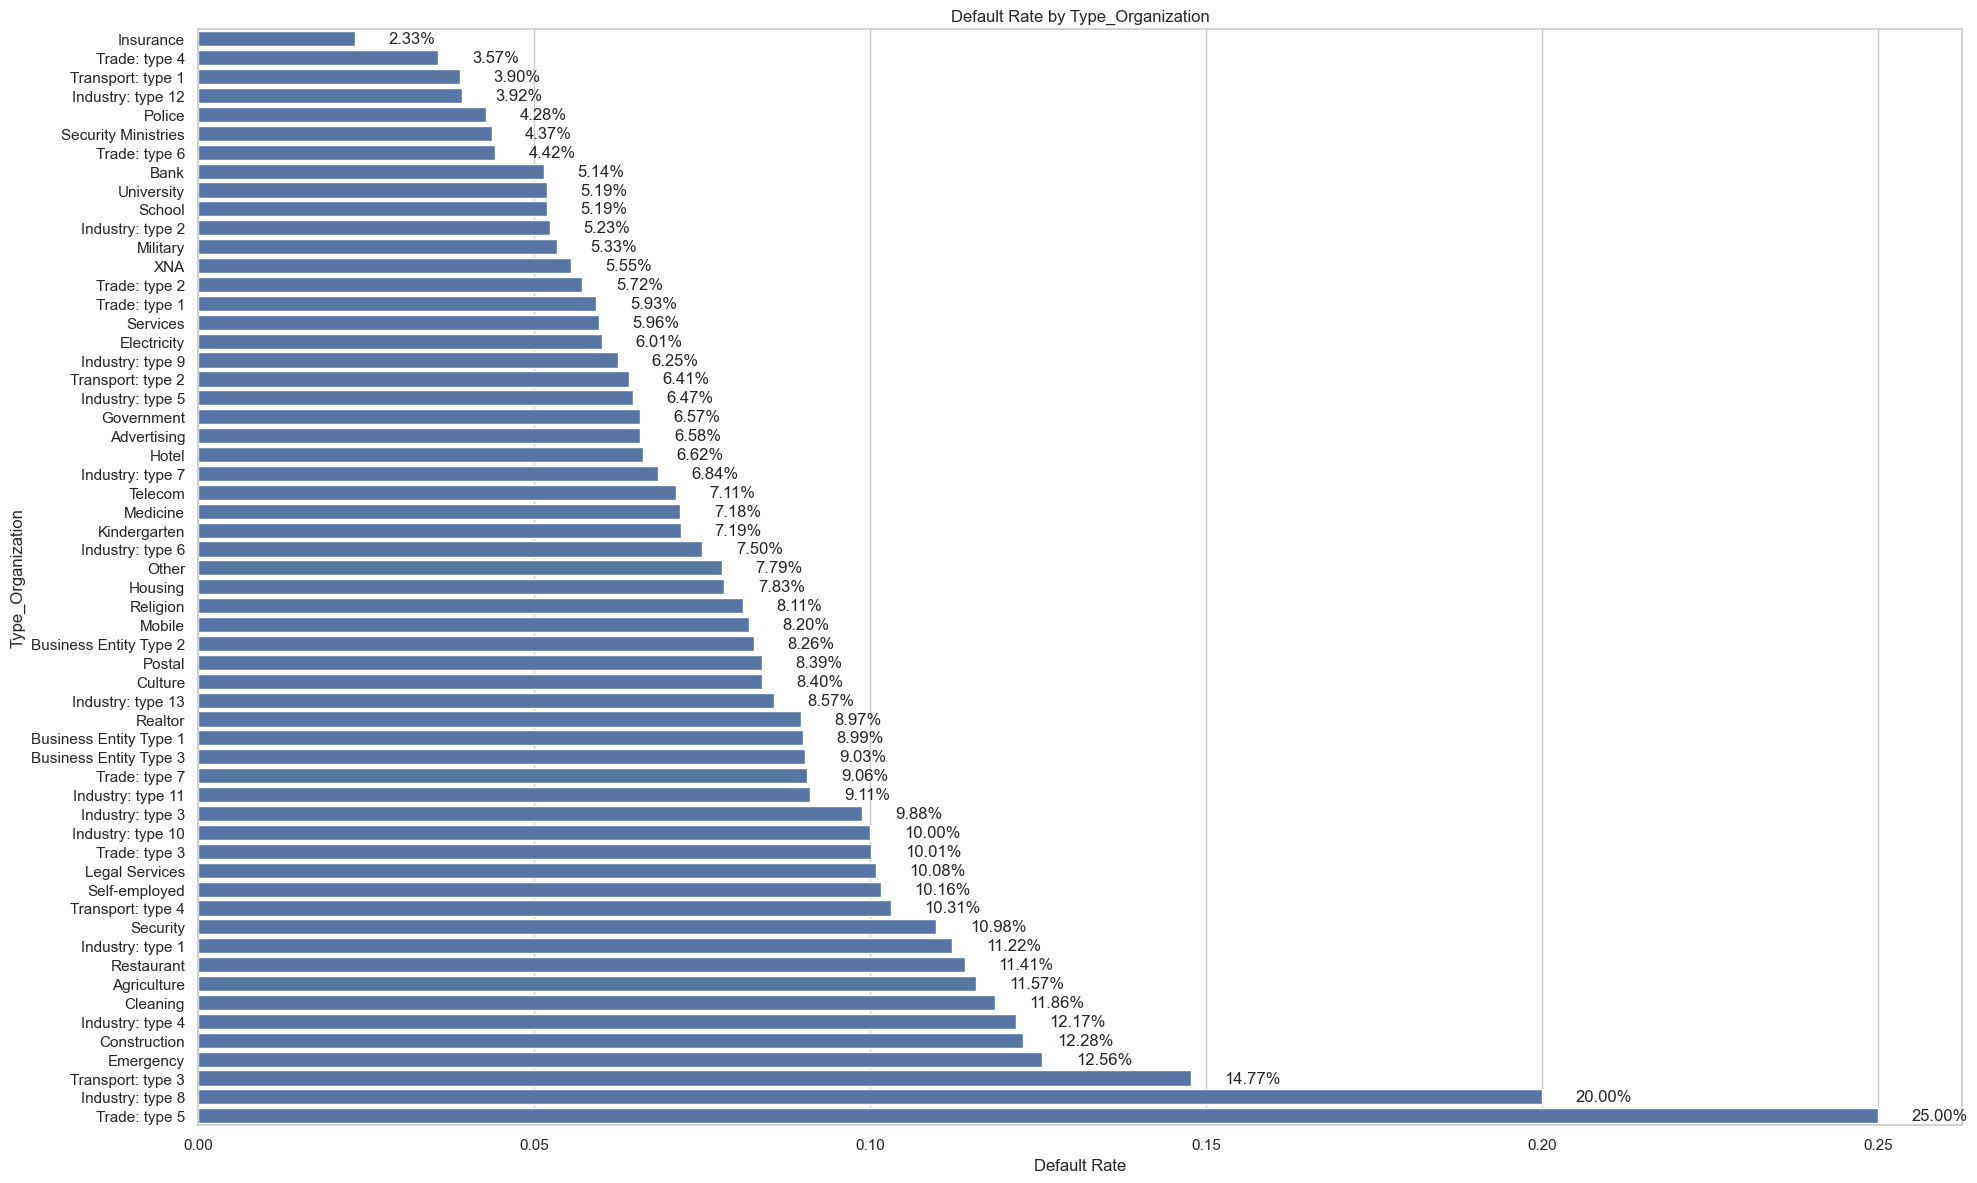

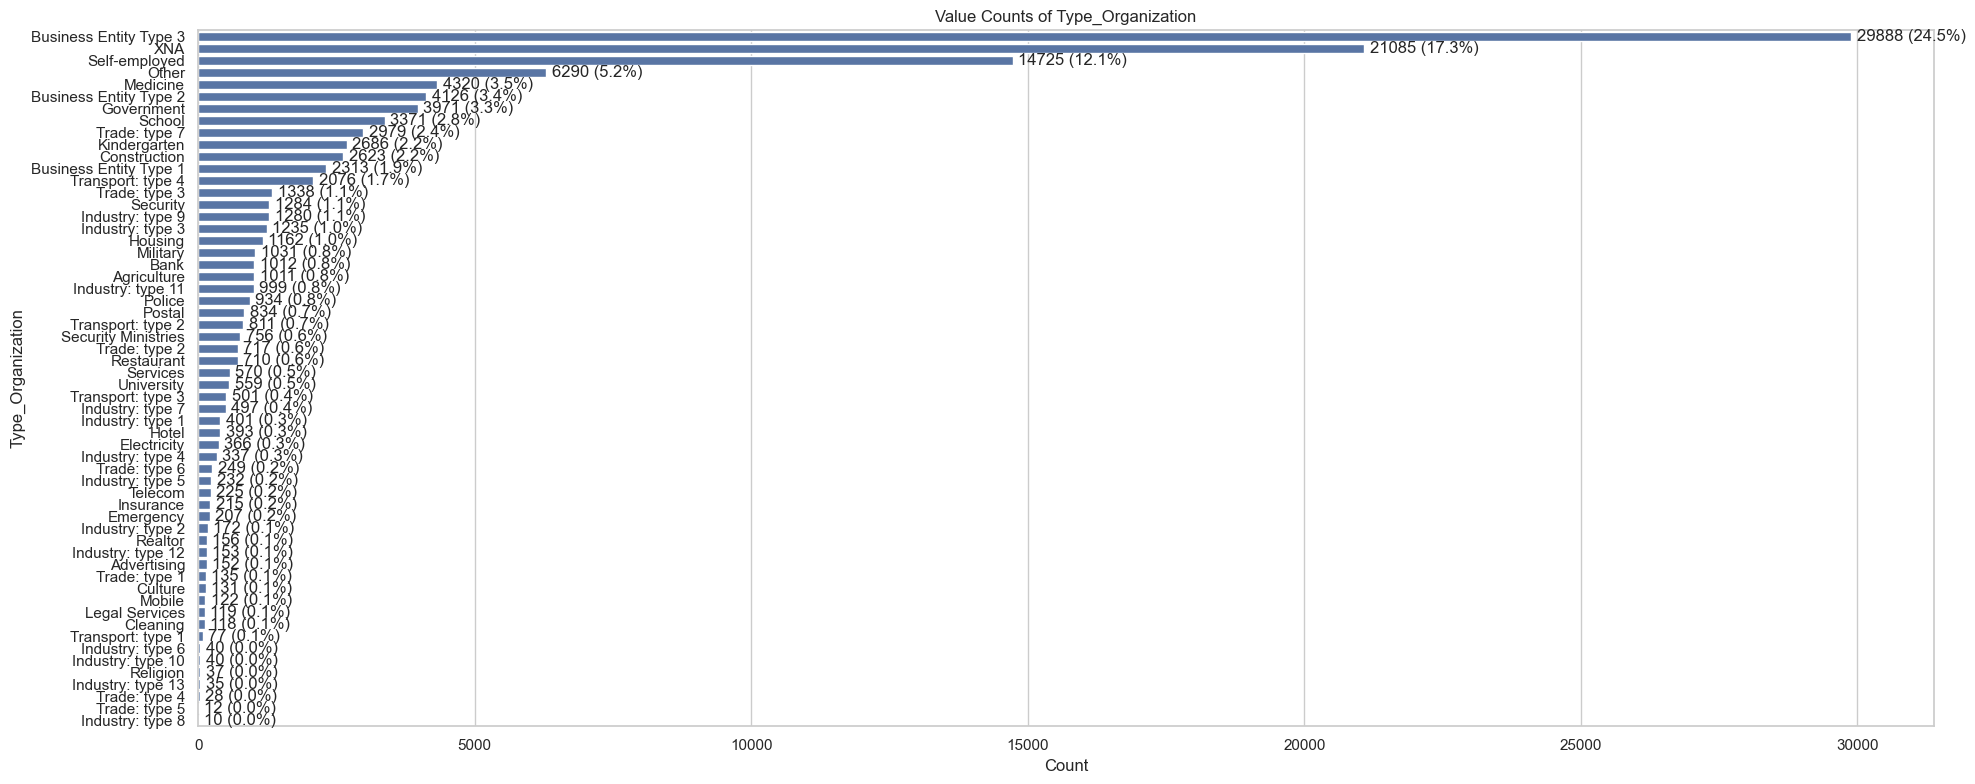

Type_Organization  Default
0                Insurance     0.02
1            Trade: type 4     0.04
2        Transport: type 1     0.04
3        Industry: type 12     0.04
4                   Police     0.04
5      Security Ministries     0.04
6            Trade: type 6     0.04
7                     Bank     0.05
8               University     0.05
9                   School     0.05
10        Industry: type 2     0.05
11                Military     0.05
12                     XNA     0.06
13           Trade: type 2     0.06
14           Trade: type 1     0.06
15                Services     0.06
16             Electricity     0.06
17        Industry: type 9     0.06
18       Transport: type 2     0.06
19        Industry: type 5     0.06
20              Government     0.07
21             Advertising     0.07
22                   Hotel     0.07
23        Industry: type 7     0.07
24                 Telecom     0.07
25                Medicine     0.07
26            Kindergarten     0.07
27        Industry: type 6     0.07
28                   Other     0.08
29                 Housing     0.08
30                Religion     0.08
31                  Mobile     0.08
32  Business Entity Type 2     0.08
33                  Postal     0.08
34                 Culture     0.08
35       Industry: type 13     0.09
36                 Realtor     0.09
37  Business Entity Type 1     0.09
38  Business Entity Type 3     0.09
39           Trade: type 7     0.09
40       Industry: type 11     0.09
41        Industry: type 3     0.10
42       Industry: type 10     0.10
43           Trade: type 3     0.10
44          Legal Services     0.10
45           Self-employed     0.10
46       Transport: type 4     0.10
47                Security     0.11
48        Industry: type 1     0.11
49              Restaurant     0.11
50             Agriculture     0.12
51                Cleaning     0.12
52        Industry: type 4     0.12
53            Construction     0.12
54               Emergency     0.13
55       Transport: type 3     0.15
56        Industry: type 8     0.20
57           Trade: type 5     0.25

In [271]:


col = 'Type_Organization'
plot_col_vs_default_rate(col)
plot_values_count(col)
user_data.groupby(col)['Default'].mean().sort_values(ascending=True).reset_index()

In [272]:
def bin_type_organization(org):
    very_low = ['Insurance', 'Trade: type 4', 'Transport: type 1', 'Industry: type 12', 'Police', 'Security Ministries']
    low = ['Bank', 'University', 'School', 'Industry: type 2', 'Military', 'XNA', 'Trade: type 2', 'Trade: type 1',
           'Services', 'Electricity', 'Industry: type 9', 'Transport: type 2', 'Industry: type 5']
    medium = ['Government', 'Advertising', 'Hotel', 'Industry: type 7', 'Telecom', 'Medicine', 'Kindergarten',
              'Industry: type 6', 'Other', 'Housing', 'Religion', 'Mobile', 'Business Entity Type 2', 'Postal', 'Culture']
    high = ['Industry: type 13', 'Realtor', 'Business Entity Type 1', 'Business Entity Type 3', 'Trade: type 7',
            'Industry: type 11', 'Industry: type 3', 'Industry: type 10', 'Trade: type 3', 'Legal Services',
            'Self-employed', 'Transport: type 4']
    very_high = ['Security', 'Industry: type 1', 'Restaurant', 'Agriculture', 'Cleaning', 'Industry: type 4',
                 'Construction', 'Emergency', 'Transport: type 3', 'Industry: type 8', 'Trade: type 5']

    if org in very_low:
        return 'Very_Low_Risk'
    elif org in low:
        return 'Low_Risk'
    elif org in medium:
        return 'Medium_Risk'
    elif org in high:
        return 'High_Risk'
    elif org in very_high:
        return 'Very_High_Risk'
    else:
        return 'Unknown'

user_data['Org_Type_Binned'] = user_data['Type_Organization'].apply(bin_type_organization)
user_data.drop(columns='Type_Organization',inplace=True)


In [273]:
print(user_data['Org_Type_Binned'].value_counts(dropna=False))

Org_Type_Binned
High_Risk         55903
Low_Risk          31341
Medium_Risk       24986
Very_High_Risk     7214
Very_Low_Risk      2163
Unknown             249
Name: count, dtype: int64


In [274]:
user_data['Org_Type_Binned'].describe()

count        121856
unique            6
top       High_Risk
freq          55903
Name: Org_Type_Binned, dtype: object

In [275]:
# Encoding Method	Should we Use It?	Why?
# already we have defined order of risk -> label encoding should be used

In [276]:
user_data['Client_Permanent_Match_Tag'].value_counts()
# one hot encoding


Client_Permanent_Match_Tag
Yes    112454
No       9402
Name: count, dtype: int64

In [277]:
user_data['Client_Contact_Work_Tag'].value_counts()
# one hot encoding

Client_Contact_Work_Tag
Yes    100015
No      21841
Name: count, dtype: int64

In [278]:
user_data.select_dtypes(include="object")

Client_Income_Type    Client_Education Client_Marital_Status  \
0              Commercial           Secondary                     M   
1                 Service          Graduation                     M   
2                 Service  Graduation dropout                     W   
3                 Retired           Secondary                     M   
4              Commercial           Secondary                     M   
...                   ...                 ...                   ...   
121851            Service           Secondary                     M   
121852         Commercial          Graduation                     M   
121853           Govt Job           Secondary                     M   
121854            Service          Graduation                     M   
121855         Commercial           Secondary                     S   

       Client_Gender Loan_Contract_Type Client_Housing_Type  \
0               Male                 CL                Home   
1               Male                 CL                Home   
2               Male                 CL              Family   
3               Male                 CL                Home   
4             Female                 CL                Home   
...              ...                ...                 ...   
121851        Female                 CL                Home   
121852        Female                 CL                Home   
121853          Male                 CL                Home   
121854        Female                 CL                Home   
121855          Male                 CL                Home   

       Client_Permanent_Match_Tag Client_Contact_Work_Tag  \
0                             Yes                     Yes   
1                             Yes                     Yes   
2                             Yes                     Yes   
3                             Yes                     Yes   
4                             Yes                     Yes   
...                           ...                     ...   
121851                        Yes                      No   
121852                        Yes                     Yes   
121853                         No                      No   
121854                        Yes                     Yes   
121855                        Yes                     Yes   

       Occupation_Risk_Level Org_Type_Binned  
0                Medium_Risk       High_Risk  
1                Medium_Risk     Medium_Risk  
2                Medium_Risk       High_Risk  
3                Medium_Risk        Low_Risk  
4                Medium_Risk       High_Risk  
...                      ...             ...  
121851           Medium_Risk     Medium_Risk  
121852           Medium_Risk       High_Risk  
121853              Low_Risk         Unknown  
121854           Medium_Risk       High_Risk  
121855              Low_Risk       High_Risk  

[121856 rows x 10 columns]

In [279]:
# Label encoding:
# - Occupation_Risk_Level
# - Org_Type_Binned

# One hot encoding:
# # - rest all categorical col


In [280]:
user_data['Occupation_Risk_Level'].value_counts(dropna=False)

Occupation_Risk_Level
Medium_Risk    82013
Low_Risk       26999
High_Risk      12844
Name: count, dtype: int64

In [281]:
user_data['Org_Type_Binned'].value_counts(dropna=False)

Org_Type_Binned
High_Risk         55903
Low_Risk          31341
Medium_Risk       24986
Very_High_Risk     7214
Very_Low_Risk      2163
Unknown             249
Name: count, dtype: int64

In [282]:
risk_mapping = {
    'Very_Low_Risk': 0,
    'Low_Risk': 1,
    'Medium_Risk': 2,
    'High_Risk': 3,
    'Very_High_Risk': 4,
    'Unknown': -1  # optional, in case of unknowns
}

user_data['Occupation_Risk_Level'] = user_data['Occupation_Risk_Level'].map(risk_mapping)



In [283]:
user_data['Org_Type_Binned'] = user_data['Org_Type_Binned'].map(risk_mapping)


In [284]:
user_data['Occupation_Risk_Level'].value_counts(dropna=False)

Occupation_Risk_Level
2    82013
1    26999
3    12844
Name: count, dtype: int64

In [285]:
user_data['Org_Type_Binned'].value_counts(dropna=False)

Org_Type_Binned
 3    55903
 1    31341
 2    24986
 4     7214
 0     2163
-1      249
Name: count, dtype: int64

In [286]:
user_data.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Accompany_Client                int64
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Homephone_Tag                   int64
Workphone_Working               int64
Cleint_City_Rating            float64
Application_Process_Day       float64
Application_Process_Hour      float64
Client_Permanent_Match_Tag     object
Client_Contact_Work_Tag        object
Score_Source_2                float64
Score_Source_3                float64
Phone_Change

In [287]:
list(user_data.select_dtypes(object).columns)

['Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag']

In [288]:
# !pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [289]:
categorical_cols = list(user_data.select_dtypes(object).columns)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Keeps all other columns (like numerical ones)
)
transformed_data = preprocessor.fit_transform(user_data)
# Get new encoded column names
encoded_col_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Get non-transformed columns
non_cat_cols = [col for col in user_data.columns if col not in categorical_cols]

# Combine all column names
all_col_names = list(encoded_col_names) + non_cat_cols

# Convert to DataFrame
user_data_encoded = pd.DataFrame(transformed_data, columns=all_col_names)

user_data_encoded

Client_Income_Type_Govt Job  Client_Income_Type_Others  \
0                              0.00                       0.00   
1                              0.00                       0.00   
2                              0.00                       0.00   
3                              0.00                       0.00   
4                              0.00                       0.00   
...                             ...                        ...   
121851                         0.00                       0.00   
121852                         0.00                       0.00   
121853                         1.00                       0.00   
121854                         0.00                       0.00   
121855                         0.00                       0.00   

        Client_Income_Type_Retired  Client_Income_Type_Service  \
0                             0.00                        0.00   
1                             0.00                        1.00   
2                             0.00                        1.00   
3                             1.00                        0.00   
4                             0.00                        0.00   
...                            ...                         ...   
121851                        0.00                        1.00   
121852                        0.00                        0.00   
121853                        0.00                        0.00   
121854                        0.00                        1.00   
121855                        0.00                        0.00   

        Client_Income_Type_Unemployed  Client_Education_Graduation dropout  \
0                                0.00                                 0.00   
1                                0.00                                 0.00   
2                                0.00                                 1.00   
3                                0.00                                 0.00   
4                                0.00                                 0.00   
...                               ...                                  ...   
121851                           0.00                                 0.00   
121852                           0.00                                 0.00   
121853                           0.00                                 0.00   
121854                           0.00                                 0.00   
121855                           0.00                                 0.00   

        Client_Education_Junior secondary  Client_Education_Post Grad  \
0                                    0.00                        0.00   
1                                    0.00                        0.00   
2                                    0.00                        0.00   
3                                    0.00                        0.00   
4                                    0.00                        0.00   
...                                   ...                         ...   
121851                               0.00                        0.00   
121852                               0.00                        0.00   
121853                               0.00                        0.00   
121854                               0.00                        0.00   
121855                               0.00                        0.00   

        Client_Education_Secondary  Client_Marital_Status_M  \
0                             1.00                     1.00   
1                             0.00                     1.00   
2                             0.00                     0.00   
3                             1.00                     1.00   
4                             1.00                     1.00   
...                            ...                      ...   
121851                        1.00                     1.00   
121852                        0.00                     1.00   
121853                        1.00       

In [290]:
list(user_data_encoded.columns)

['Client_Income_Type_Govt Job',
 'Client_Income_Type_Others',
 'Client_Income_Type_Retired',
 'Client_Income_Type_Service',
 'Client_Income_Type_Unemployed',
 'Client_Education_Graduation dropout',
 'Client_Education_Junior secondary',
 'Client_Education_Post Grad',
 'Client_Education_Secondary',
 'Client_Marital_Status_M',
 'Client_Marital_Status_S',
 'Client_Marital_Status_W',
 'Client_Gender_Male',
 'Loan_Contract_Type_RL',
 'Client_Housing_Type_Home',
 'Client_Housing_Type_Municipal',
 'Client_Housing_Type_Office',
 'Client_Housing_Type_Rental',
 'Client_Housing_Type_Shared',
 'Client_Permanent_Match_Tag_Yes',
 'Client_Contact_Work_Tag_Yes',
 'Client_Income',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Accompany_Client',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Homephone_Tag',
 'Workphone_Working',
 'Cleint_City_Rating',
 'Application_Process_Day',
 'Application_Process_Hour',
 'Score_Source_2',
 'Score_Sourc

In [291]:
user_data_encoded.isna().sum()

Client_Income_Type_Govt Job               0
Client_Income_Type_Others                 0
Client_Income_Type_Retired                0
Client_Income_Type_Service                0
Client_Income_Type_Unemployed             0
Client_Education_Graduation dropout       0
Client_Education_Junior secondary         0
Client_Education_Post Grad                0
Client_Education_Secondary                0
Client_Marital_Status_M                   0
Client_Marital_Status_S                   0
Client_Marital_Status_W                   0
Client_Gender_Male                        0
Loan_Contract_Type_RL                     0
Client_Housing_Type_Home                  0
Client_Housing_Type_Municipal             0
Client_Housing_Type_Office                0
Client_Housing_Type_Rental                0
Client_Housing_Type_Shared                0
Client_Permanent_Match_Tag_Yes            0
Client_Contact_Work_Tag_Yes               0
Client_Income                             0
Car_Owned                       

In [292]:
# Data cleaning/transformation process is now done.
# - Adjust data types as per data
# - Impute missing values
# - Clip outliers
# - convert categorical to numeric - label encoding & One hot encoding

In [293]:
user_data_encoded

Client_Income_Type_Govt Job  Client_Income_Type_Others  \
0                              0.00                       0.00   
1                              0.00                       0.00   
2                              0.00                       0.00   
3                              0.00                       0.00   
4                              0.00                       0.00   
...                             ...                        ...   
121851                         0.00                       0.00   
121852                         0.00                       0.00   
121853                         1.00                       0.00   
121854                         0.00                       0.00   
121855                         0.00                       0.00   

        Client_Income_Type_Retired  Client_Income_Type_Service  \
0                             0.00                        0.00   
1                             0.00                        1.00   
2                             0.00                        1.00   
3                             1.00                        0.00   
4                             0.00                        0.00   
...                            ...                         ...   
121851                        0.00                        1.00   
121852                        0.00                        0.00   
121853                        0.00                        0.00   
121854                        0.00                        1.00   
121855                        0.00                        0.00   

        Client_Income_Type_Unemployed  Client_Education_Graduation dropout  \
0                                0.00                                 0.00   
1                                0.00                                 0.00   
2                                0.00                                 1.00   
3                                0.00                                 0.00   
4                                0.00                                 0.00   
...                               ...                                  ...   
121851                           0.00                                 0.00   
121852                           0.00                                 0.00   
121853                           0.00                                 0.00   
121854                           0.00                                 0.00   
121855                           0.00                                 0.00   

        Client_Education_Junior secondary  Client_Education_Post Grad  \
0                                    0.00                        0.00   
1                                    0.00                        0.00   
2                                    0.00                        0.00   
3                                    0.00                        0.00   
4                                    0.00                        0.00   
...                                   ...                         ...   
121851                               0.00                        0.00   
121852                               0.00                        0.00   
121853                               0.00                        0.00   
121854                               0.00                        0.00   
121855                               0.00                        0.00   

        Client_Education_Secondary  Client_Marital_Status_M  \
0                             1.00                     1.00   
1                             0.00                     1.00   
2                             0.00                     0.00   
3                             1.00                     1.00   
4                             1.00                     1.00   
...                            ...                      ...   
121851                        1.00                     1.00   
121852                        0.00                     1.00   
121853                        1.00       

In [294]:
user_data_encoded.to_csv("processed-data/loan-processed-data.csv", index=False)